# Import All Relevant Packages


This cell imports all the necessary libraries and modules for the notebook. This includes:

- `sqlite3`: For interacting with the SQLite database.
- `pandas`: For data manipulation and analysis, particularly with DataFrames.
- `sklearn`: The scikit-learn library for machine learning tasks, including model selection, preprocessing, and metrics.
- `seaborn` and `matplotlib.pyplot`: For data visualization.
- `google.colab.drive`: For mounting Google Drive to access files.
- Various modules from `sklearn` for specific machine learning algorithms (SVC, KNeighborsClassifier, GaussianNB, DecisionTreeClassifier) and techniques (train_test_split, StratifiedKFold, GridSearchCV, StandardScaler, OneHotEncoder, ColumnTransformer, Pipeline, SimpleImputer, classification_report, confusion_matrix, balanced_accuracy_score, make_scorer, f1_score).
- `imblearn.over_sampling.SMOTE` and `imblearn.pipeline.Pipeline`: For handling imbalanced datasets using oversampling techniques.
- `ipywidgets`: For creating interactive controls like dropdowns.
- `IPython.display`: For displaying rich output like widgets and plots.

In [ ]:
# @title
import sqlite3
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
from google.colab import drive
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # in case SVM is used in the future
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer, f1_score
from IPython.display import display, Markdown
import ipywidgets as widgets
from IPython.display import display, clear_output
from matplotlib.patches import Patch
from sklearn.preprocessing import LabelEncoder
import numpy as np # Import numpy

# Create Relevant Functions

This section contains functions created to perform various tasks, including:

1. **Open DB connections and select the table**: Functions to establish a connection to the SQLite database and select data from a specified table.
2. **Close the connection**: A function to close the database connection.
3. **Clean and Analyze Dataframe**: A function to perform basic data cleaning and display descriptive statistics, missing values, and duplicate rows.
4. **Plotting**: Code to generate plots for visualizing the distribution of missing values in selected columns.
5. **Relevant Engineering functions**: Functions related to data imputation, specifically imputing missing values using the median.

In [ ]:
# @title
import sqlite3
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
from google.colab import drive
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # in case SVM is used in the future
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer, f1_score
from IPython.display import display, Markdown
import ipywidgets as widgets
from IPython.display import display, clear_output
from matplotlib.patches import Patch
from sklearn.preprocessing import LabelEncoder
import numpy as np # Import numpy

def open_db_connection(db_name):
    """
    Opens a connection to an SQLite database and returns the connection and cursor.

    Args:
        db_name (str): The name of the database file.

    Returns:
        tuple: A tuple containing the connection and cursor objects, or (None, None) if an error occurs.
    """
    conn = None
    cursor = None
    try:
        # Connect to the database
        drive.mount('/content/drive')
        filepath = '/content/drive/MyDrive/Assignment2025S2.sqlite'
        conn = sqlite3.connect(filepath)
        cursor = conn.cursor()
        print(f"Connection to {db_name} opened successfully.")

        # Display tables in the database
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()
        print("Tables in the database:")
        for table in tables:
            print(table[0])

        return conn, cursor
    except sqlite3.Error as e:
        print(f"Database error: {e}")
        return None, None

def select_from_table(cursor, table_name, columns="*"):
    """
    Executes a SELECT query on a given table using an existing cursor and returns the results as a pandas DataFrame.

    Args:
        cursor (sqlite3.Cursor): The database cursor object.
        table_name (str): The name of the table to query.
        columns (str, optional): A comma-separated string of column names to select.
                                 Defaults to "*", selecting all columns.

    Returns:
        pandas.DataFrame: A pandas DataFrame containing the query results, or None if an error occurs.
    """
    try:
        query = f"SELECT {columns} FROM {table_name};"
        cursor.execute(query)
        results = cursor.fetchall()

        # Get column names from the cursor description
        column_names = [description[0] for description in cursor.description]

        # Create a pandas DataFrame
        df = pd.DataFrame(results, columns=column_names)
        print(f"Query executed successfully on table '{table_name}'.")
        return df
    except sqlite3.Error as e:
        print(f"Database error: {e}")
        return None

def close_db_connection(conn):
    """
    Commits changes and closes the database connection.

    Args:
        conn (sqlite3.Connection): The database connection object.
    """
    if conn:
        try:
            conn.commit()
            conn.close()
            print("Connection closed.")
        except sqlite3.Error as e:
            print(f"Database error: {e}")

def process_database_data(db_name):
    """
    Opens a connection to a database, allows the user to select a table and display its data,
    and then closes the connection.

    Args:
        db_name (str): The name of the database file.

    Returns:
        pandas.DataFrame: A pandas DataFrame containing the selected data, or None if an error occurs.
    """
    conn, cursor = open_db_connection(db_name)

    if conn and cursor:
        table_to_select = input("\nEnter the name of the table you want to select data from ('test' or 'train'): ")
        selected_data_df = select_from_table(cursor, table_to_select, columns="*")

        if selected_data_df is not None:
            print(f"\nData from table '{table_to_select}':")
            display(selected_data_df)
        else:
            print(f"No data found or an error occurred while selecting from '{table_to_select}'.")

        close_db_connection(conn)
        return selected_data_df
    else:
        print("Failed to open database connection.")
        return None

# Example of how to call the new function:
# db_name = 'Assignment2025S2.sqlite'
# selected_data_df = process_database_data(db_name)

def clean_and_analyze_data(df):
    """
    Performs basic data cleaning and analysis on a pandas DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to clean and analyze.
    """
    print("--- DataFrame Info ---")
    df.info()

    print("\n--- DataFrame Description ---")
    display(df.describe())

    print("\n--- Missing Values Count ---")
    missing_values = df.isnull().sum()
    print(missing_values)

    print("\n--- Description of Columns with Missing Values ---")
    missing_columns = missing_values[missing_values > 0].index
    if not missing_columns.empty:
        display(df[missing_columns].describe())
    else:
        print("No columns with missing values.")

    print("\n--- Duplicate Rows Count ---")
    num_duplicates = df.duplicated().sum()
    if num_duplicates == 0:
        print("There are no duplicate rows.")
    else:
        print(f"There are {num_duplicates} rows duplicated in the df.")

# Function to plot the distribution for the selected column
def plot_distribution(column):
    with output_widget:
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        if selected_data_df[column].dtype in ['float64', 'int64']:
            sns.histplot(selected_data_df[column].dropna(), kde=True)
            plt.title(f'Distribution of {column}')
        else:
            selected_data_df[column].value_counts().plot(kind='bar')
            plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

def visualize_model_results(results, results_df):
    """
    Visualizes model performance metrics and confusion matrices interactively.

    Args:
        results (dict): A dictionary containing detailed results for each model.
        results_df (pandas.DataFrame): A DataFrame summarizing model performance.
    """

    print("=== Model Results Visualization ===")

    # Create dropdowns for visualization type and model selection
    visualization_type_dropdown = widgets.Dropdown(
        options=['All Plots', 'Performance Metrics', 'Confusion Matrix', 'Test F1-Macro Scores', 'Class Distribution'],
        description='Select Visualization:'
    )

    model_selection_dropdown = widgets.Dropdown(
        options=results.keys(),
        description='Select Model (for Confusion Matrix):'
    )

    # Output widget to display plots
    output_widget = widgets.Output()

    def display_visualizations(visualization_type, selected_model):
        with output_widget:
            clear_output(wait=True)

            if visualization_type == 'All Plots' or visualization_type == 'Performance Metrics':
                # 1. Performance metrics comparison
                plt.figure(figsize=(10, 6))
                metrics_df = results_df.set_index('Model')[['CV F1-Score', 'Test Balanced Accuracy', 'Test F1-Macro']]
                metrics_df.plot(kind='bar', ax=plt.gca(), width=0.8)
                plt.title('Performance Metrics Comparison')
                plt.ylabel('Score')
                plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()

            if visualization_type == 'All Plots' or visualization_type == 'Confusion Matrix':
                # 2. Confusion matrix for selected model
                if selected_model in results:
                    plt.figure(figsize=(8, 6))
                    cm = results[selected_model]['confusion_matrix']
                    # Assuming class names are available from the original target variable 'y'
                    class_names = sorted(pd.Series(y).unique()) # Using 'y' from the global scope
                    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm_r', # Changed cmap here
                                xticklabels=class_names, yticklabels=class_names)
                    plt.title(f'Confusion Matrix - {selected_model}')
                    plt.xlabel('Predicted')
                    plt.ylabel('Actual')
                    plt.show()
                else:
                    print(f"Confusion matrix not available for model: {selected_model}")


            if visualization_type == 'All Plots' or visualization_type == 'Test F1-Macro Scores':
                 # 3. F1-Score comparison
                plt.figure(figsize=(10, 6))
                f1_scores = [results[model]['test_f1_macro'] for model in results_df['Model']]
                bars = plt.bar(results_df['Model'], f1_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
                plt.title('Test F1-Macro Scores')
                plt.ylabel('F1-Macro Score')
                plt.xticks(rotation=45, ha='right')

                # Add value labels on bars
                for bar, score in zip(bars, f1_scores):
                    height = bar.get_height()
                    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                             f'{score:.3f}', ha='center', va='bottom')
                plt.tight_layout()
                plt.show()


            if visualization_type == 'All Plots' or visualization_type == 'Class Distribution':
                 # 4. Class distribution comparison (requires y_train and y_train_balanced)
                 # Assuming y_train and y_train_balanced are available in the global scope
                 try:
                     plt.figure(figsize=(8, 6))
                     class_dist_before = pd.Series(y_train).value_counts().sort_index()
                     class_dist_after = pd.Series(y_train_balanced).value_counts().sort_index()

                     x = range(len(class_dist_before))
                     width = 0.35

                     plt.bar([i - width/2 for i in x], class_dist_before.values, width,
                             label='Before SMOTE', alpha=0.8, color='lightcoral')
                     plt.bar([i + width/2 for i in x], class_dist_after.values, width,
                             label='After SMOTE', alpha=0.8, color='lightgreen')

                     plt.title('Class Distribution: Before vs After SMOTE')
                     plt.xlabel('Classes')
                     plt.ylabel('Number of Samples')
                     plt.xticks(x, class_dist_before.index)
                     plt.legend()
                     plt.tight_layout()
                     plt.show()
                 except NameError:
                     print("Class distribution plots require 'y_train' and 'y_train_balanced' to be defined.")


    # Link the dropdowns to the display function
    widgets.interactive(display_visualizations,
                        visualization_type=visualization_type_dropdown,
                        selected_model=model_selection_dropdown)

    # Display the dropdowns and the output
    display(visualization_type_dropdown, model_selection_dropdown, output_widget)

# Example of how to call the function:
# visualize_model_results(results, results_df)

# Function to plot the distribution for the selected numerical column
def plot_numerical_distribution(column):
    with numerical_output_widget:
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        sns.histplot(selected_data_df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

def create_pca_pipeline_and_plot_variance(preprocessor, X_train):
    """
    Defines a pipeline with preprocessing, PCA, and SMOTE, and plots the
    cumulative explained variance ratio of PCA.

    Args:
        preprocessor (ColumnTransformer): The fitted preprocessor object.
        X_train (pandas.DataFrame): The training feature data.

    Returns:
        ImbPipeline: The pipeline object including preprocessor, PCA, and SMOTE.
    """
    # Define a pipeline with preprocessing, PCA, and a placeholder for the classifier
    # The number of components for PCA can be tuned later using GridSearchCV
    pca = PCA(n_components=0.95, random_state=42) # Example: retain 95% of variance

    # Create the full pipeline including preprocessor, PCA, SMOTE, and classifier placeholder
    # Note: SMOTE is placed after PCA
    pipeline_with_pca = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('smote', SMOTE(random_state=42)),
        ('classifier', 'passthrough') # Placeholder for the classifier
    ])

    print("Pipeline with Preprocessing, PCA, and SMOTE created successfully!")
    print("You can now use this pipeline structure in your model training and tuning.")

    # --- PCA Explained Variance Plotting ---
    # Apply the preprocessor to X_train before fitting PCA for the plot
    X_train_preprocessed_for_pca_plot = preprocessor.fit_transform(X_train)

    # Do a PCA transform on the preprocessed data
    pca_plot = PCA()
    pca_plot.fit(X_train_preprocessed_for_pca_plot)

    # Determine how many components are required to explain 90% of the variance
    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(np.cumsum(pca_plot.explained_variance_ratio_)) # Use pca_plot
    ax.set_xlabel('number of components')
    ax.set_ylabel('cumulative explained variance')
    # Adjust xticks based on the number of features after preprocessing
    num_features_after_preprocessing = X_train_preprocessed_for_pca_plot.shape[1]
    ax.set_xticks(np.arange(0, num_features_after_preprocessing + 1, 5)) # Adjust ticks for better readability
    ax.set_xticklabels(np.arange(1, num_features_after_preprocessing + 2, 5)) # Adjust labels accordingly
    ax.set_ylim([0,1.05])
    ax.hlines(y=0.9, xmin=0, xmax=num_features_after_preprocessing, linestyles='--')
    plt.title('PCA Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

    return pipeline_with_pca

# Example of how to call the function:
# pipeline_with_pca = create_pca_pipeline_and_plot_variance(preprocessor, X_train)

# sampling cross-validation encoder
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """
    Create a sample plot for indices of a cross-validation object.
    Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#define-a-function-to-visualize-cross-validation-behavior

    Parameters
    ----------
    cv: cross validation method

    X : training data

    y : data labels

    ax : matplolib axes object

    n_splits : number of splits

    lw : line width for plotting
    """

    # Turn labels into integers
    le = LabelEncoder()
    y = le.fit_transform(y)


    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class']
    ax.set(yticks=np.arange(n_splits+1) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+1.2, -.2])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

# impute missing with median function for test data
def impute_missing_with_median(df, columns):
    """
    Imputes missing values in specified columns of a DataFrame using the median.

    Args:
        df (pandas.DataFrame): The DataFrame to impute missing values in.
        columns (list): A list of column names to impute.

    Returns:
        pandas.DataFrame: The DataFrame with missing values imputed.
    """
    df_imputed = df.copy()
    for column in columns:
        if df_imputed[column].isnull().any():
            median_value = df_imputed[column].median()
            df_imputed[column].fillna(median_value, inplace=True)
            print(f"Imputed missing values in '{column}' with median ({median_value:.4f}).")
        else:
            print(f"Column '{column}' has no missing values.")
    return df_imputed

# Explore the 'Training' Dataset
**NOTE:** Make sure to UPLOAD Assignment2025S2.sqlite file into Google Drive

## Exploratory Data Analysis
This section focuses on exploring the 'Training' dataset loaded from the database. We will perform the following steps:

- **Data Cleaning and Analysis**: Use the `clean_and_analyze_data` function to get an overview of the dataset, including data types, missing values, and descriptive statistics.
- **Visualize Missing Values**: Plot the distribution of columns with missing values to understand their characteristics and inform imputation strategies.
- **Impute Missing Values**: Apply the `impute_missing_with_median` function to fill in missing values based on the analysis.
- **Analyze Class Distribution**: Examine the distribution of the target variable ('class') to check for class imbalance.

In [ ]:
# @title
# Run the data cleaning and analysis function on the selected data DataFrame

db_name = 'Assignment2025S2.sqlite'
selected_data_df = process_database_data(db_name)
clean_and_analyze_data(selected_data_df)

Mounted at /content/drive
Connection to Assignment2025S2.sqlite opened successfully.
Tables in the database:
train
test

Enter the name of the table you want to select data from ('test' or 'train'): train
Query executed successfully on table 'train'.

Data from table 'train':


,index,NDVI,Leaf_Area_Index,Canopy_Height,Soil_Type,Vegetation_Cover_Percent,Greenness_Index,Soil_Moisture,Soil_pH,Topsoil_Depth,...,Water_Table_Depth,Invasive_Species_Count,Litter_Presence,Distance_to_Road_m,Elevation_m,Slope_Degree,Latitude,Human_Disturbance,Longitude,class
0,0,-1.048539,19.158530,-2.822333,Sandy,-2.719420,-69.755659,27.918594,-210.992601,104.477602,...,-108.009642,0.728814,1,9.356921,-75.697435,4.977078,NaN,Low,-0.979180,Healthy
1,1,3.484490,1.723999,2.049871,Silty,-3.060881,-119.747539,37.771322,-16.034712,-73.930271,...,-184.975732,2.814332,0,11.572534,96.890755,-2.566023,1.244891,Low,-6.103427,Healthy
2,2,-6.413664,-37.868479,6.349476,Silty,-6.627364,147.352594,-34.179104,74.279103,-62.473436,...,-23.929527,5.644111,0,11.591552,-23.894965,-0.532001,1.632769,Low,-0.083029,Degraded
3,3,-1.390974,-30.247635,-6.433968,Silty,2.930972,138.995214,-18.536382,-46.596450,-54.776569,...,-34.066942,1.931963,0,3.331343,27.552224,-6.371492,-1.220004,Low,1.097303,Healthy
4,4,6.323038,-29.522216,-0.845040,Silty,3.530179,-153.199486,-31.178249,105.526584,-236.520518,...,12.797334,-11.737187,1,16.580642,-14.927977,-5.202752,1.411652,Low,5.363501,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,0.841413,56.117397,-2.698657,Clay,1.545734,30.133155,33.251185,101.685491,-63.607428,...,55.069783,-7.442473,1,9.074819,-31.474530,7.241943,NaN,Low,-2.958244,Degraded
4996,4996,-2.387714,-16.217542,-1.375386,Loam,0.015622,13.596389,18.103309,-17.400232,116.076425,...,81.965259,-3.085280,1,14.165339,17.892229,-2.810032,NaN,Low,-6.533139,Degraded
4997,4997,-2.415384,-29.705887,2.932198,Clay,18.505129,-30.671853,-9.765372,72.997258,55.537695,...,-19.640996,12.771218,1,0.072903,43.474051,0.923143,NaN,Low,-1.364460,Degraded
4998,4998,-2.791797,24.870881,-0.689178,Peaty,4.846071,29.881691,-4.070184,-176.052836,17.940220,...,-67.711592,1.630187,0,11.737358,-30.512691,-6.552797,NaN,Low,4.569957,Healthy


Connection closed.
--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      5000 non-null   int64  
 1   NDVI                       5000 non-null   float64
 2   Leaf_Area_Index            5000 non-null   float64
 3   Canopy_Height              5000 non-null   float64
 4   Soil_Type                  5000 non-null   object 
 5   Vegetation_Cover_Percent   5000 non-null   float64
 6   Greenness_Index            4876 non-null   float64
 7   Soil_Moisture              5000 non-null   float64
 8   Soil_pH                    5000 non-null   float64
 9   Topsoil_Depth              5000 non-null   float64
 10  Cultural_Burn              5000 non-null   int64  
 11  Soil_Nitrogen_Level        5000 non-null   float64
 12  Burn_Season                5000 non-null   object 
 13  Flood_

,index,NDVI,Leaf_Area_Index,Canopy_Height,Vegetation_Cover_Percent,Greenness_Index,Soil_Moisture,Soil_pH,Topsoil_Depth,Cultural_Burn,...,Distance_to_Water_m,Water_Availability_Index,Water_Table_Depth,Invasive_Species_Count,Litter_Presence,Distance_to_Road_m,Elevation_m,Slope_Degree,Latitude,Longitude
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4876.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2120.000000,5000.000000
mean,2499.500000,0.992832,-6.626767,0.025254,1.601881,-18.981992,0.183267,-8.158003,24.530562,0.583000,...,-10.938738,-45.213162,12.470269,0.122072,0.508600,8.748995,0.036158,-0.057129,0.031696,-0.101952
std,1443.520003,4.227724,26.962660,2.985498,5.770923,119.790773,23.834138,83.590471,848.124520,0.493112,...,78.135533,397.384418,620.979265,6.658246,0.499976,5.019636,62.332481,3.540989,0.990361,4.866787
min,0.000000,-14.493949,-104.263966,-10.256290,-22.157562,-494.139620,-83.085447,-288.600308,-15366.887388,0.000000,...,-358.548359,-1535.364680,-15995.268534,-24.209475,0.000000,0.000000,-221.327335,-14.072619,-3.157445,-16.624674
25%,1249.750000,-1.836349,-25.416993,-2.015194,-2.065904,-100.473898,-15.735569,-63.899411,-49.183179,0.000000,...,-52.761782,-322.158271,-44.007907,-4.410345,0.000000,4.405075,-42.758604,-2.419752,-0.650146,-3.347486
50%,2499.500000,1.059246,-7.033786,-0.027194,1.795072,-18.125356,0.953752,-6.601243,22.167354,1.000000,...,-3.435719,-65.947435,2.339050,0.003069,1.000000,8.746756,-0.176569,-0.086697,0.027603,-0.055037
75%,3749.250000,3.857182,11.500324,2.030523,5.333629,61.614079,17.104884,49.337259,90.026231,1.000000,...,38.708101,219.053461,49.811112,4.669627,1.000000,13.088437,41.904322,2.292500,0.735886,3.169789
max,4999.000000,15.470266,95.025008,11.090515,24.147897,479.690303,79.746010,284.211574,20291.079011,1.000000,...,282.097327,1407.738054,14930.171485,23.053118,1.000000,17.430119,237.303988,13.668344,3.276324,17.336054



--- Missing Values Count ---
index                           0
NDVI                            0
Leaf_Area_Index                 0
Canopy_Height                   0
Soil_Type                       0
Vegetation_Cover_Percent        0
Greenness_Index               124
Soil_Moisture                   0
Soil_pH                         0
Topsoil_Depth                   0
Cultural_Burn                   0
Soil_Nitrogen_Level             0
Burn_Season                     0
Flood_Risk_Zone                 0
Invasive_Species_Presence       0
Days_Since_Burn              1072
Surface_Water_Presence          0
Landform                        0
Fire_Intensity_Score            0
Regrowth_Indicator              0
Distance_to_Water_m             0
Water_Availability_Index        0
Water_Table_Depth               0
Invasive_Species_Count          0
Litter_Presence                 0
Distance_to_Road_m              0
Elevation_m                     0
Slope_Degree                    0
Latitude          

,Greenness_Index,Days_Since_Burn,Latitude
count,4876.000000,3928.000000,2120.000000
mean,-18.981992,5.835748,0.031696
std,119.790773,17.908337,0.990361
min,-494.139620,-60.491257,-3.157445
25%,-100.473898,-6.610669,-0.650146
50%,-18.125356,5.773722,0.027603
75%,61.614079,17.579402,0.735886
max,479.690303,75.430177,3.276324



--- Duplicate Rows Count ---
There are no duplicate rows.


In [ ]:
# @title
display(Markdown("### Plotting Distribution of Missing Values"))
display(Markdown("We will now plot the distribution for the missing values to decide on how to fill up the NA values in the train dataset."))

# Identify columns with missing values
missing_values = selected_data_df.isnull().sum()
missing_columns = missing_values[missing_values > 0].index

# Create a dropdown widget to select the column
column_dropdown = widgets.Dropdown(
    options=missing_columns,
    description='Select column:'
)

# Create an output widget to display the plot
output_widget = widgets.Output()

# Link the dropdown value to the plotting function
widgets.interactive(plot_distribution, column=column_dropdown)

# Display the dropdown and the output
display(column_dropdown, output_widget)

### Plotting Distribution of Missing Values

We will now plot the distribution for the missing values to decide on how to fill up the NA values in the train dataset.

Dropdown(description='Select column:', options=('Greenness_Index', 'Days_Since_Burn', 'Latitude'), value='Gree…

Output()

## Missing Value Identification
Given that some columns with missing values have a high standard deviation and the distribution plots above appear close to normal, using the median to fill in the empty cells is the appropriate strategy.

Here's an extensive explanation:

1.  **Robustness to Outliers:** The median is the middle value in a dataset when sorted. Unlike the mean, which is calculated by summing all values and dividing by the count, the median is not affected by extremely large or small values (outliers). The "close-to-normally distributed" data has some outliers, with more values the mean are pulled towards these extreme values, leading to a less representative imputation. Whereas by using a median, theere is a more stable measure of the central tendency in the presence of outliers.

2.  **Less Distortion of Distribution:** Replacing missing values with the median tends to preserve the shape of the original distribution better than using the mean, especially if the distribution is not perfectly symmetrical. While the histograms might look roughly normal, they could have subtle skewness or tails that are better represented by the median.

3.  **Suitable for Skewed Data:** When it is said to be a close-to-normally distributed data, there are tendencies for skewed data to exist in the feature. These are the impacts of the real-world outliers which makes it almost impossible for a perfectly normal distribution to appear. Results produced by mean on a dataset with high variance would just increase the skew, affecting the overall result. Whereas, median would just result to another count into the high density part of the distribution.

4.  **Ease of Implementation:** Imputing with the median is computationally simple and easy to implement. It's a straightforward method that doesn't require complex modeling.

**In summary:** While the mean is often used for imputing missing values in normally distributed data, the median offers greater robustness to potential outliers or slight deviations from perfect normality. By using the median, you are less likely to introduce distortion into the dataset due to extreme values, leading to a more reliable imputation. Additionally, considering some features contains high variance as represented by the big spread like over 18 in days after burn and up to 120 in the greenness index.

## All Numeric Attribute Distribution

This section provides an overview of the distribution of all numerical attributes in the dataset after handling missing values. You can use the dropdown menu below to select a specific numerical column and visualize its distribution using a histogram and kernel density estimate (KDE) plot. This helps in understanding the spread, central tendency, and potential outliers of each numerical feature.

In [ ]:
# @title
display(Markdown("### Plotting Distribution of Numerical Features"))
display(Markdown("Select a numerical feature from the dropdown to visualize its distribution."))

# Identify numerical features from the imputed DataFrame
numerical_features_imputed = selected_data_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a dropdown widget to select the numerical column
numerical_column_dropdown = widgets.Dropdown(
    options=numerical_features_imputed,
    description='Select numerical column:'
)

# Create an output widget to display the plot
numerical_output_widget = widgets.Output()

# Link the dropdown value to the plotting function
widgets.interactive(plot_numerical_distribution, column=numerical_column_dropdown)

# Display the dropdown and the output
display(numerical_column_dropdown, numerical_output_widget)

### Plotting Distribution of Numerical Features

Select a numerical feature from the dropdown to visualize its distribution.

Dropdown(description='Select numerical column:', options=('index', 'NDVI', 'Leaf_Area_Index', 'Canopy_Height',…

Output()

# Data Preparation

**Reasoning**:
This section outlines the steps for feature engineering and preprocessing the data for machine learning. This includes:

- Separating features and the target variable.
- Identifying numerical and categorical features.
- Creating preprocessing pipelines for scaling numerical features and one-hot encoding categorical features.
- Combining these steps into a ColumnTransformer for efficient preprocessing.

## Model Definitions & Hyperparameter Grids

This section defines the machine learning models that will be trained and evaluated, along with the hyperparameter grids for each model. Hyperparameters are settings that are not learned from the data but are set before training. Tuning these hyperparameters is crucial for optimizing model performance.

For each model, the following are specified:

-   **Model Estimator:** The specific scikit-learn classifier to be used (e.g., `KNeighborsClassifier`, `DecisionTreeClassifier`, `GaussianNB`, `LogisticRegression`).
-   **Hyperparameter Grid:** A dictionary defining the range of values for the most important hyperparameters of the model. `GridSearchCV` will explore all possible combinations of these values during the tuning process to find the combination that yields the best performance.

Defining these models and their parameter grids separately makes the training and tuning process more organized and easier to manage, especially when evaluating multiple models.

In [ ]:
# @title
# MODEL DEFINITIONS & HYPERPARAMETER GRIDS

# Define models with their hyperparameter grids for tuning

models = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7, 9, 11], # Number of neighbors to use
            'classifier__weights': ['uniform', 'distance'], # Weight function used in prediction
            'classifier__metric': ['euclidean', 'manhattan'] # Distance metric to use
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'classifier__max_depth': [3, 5, 7, 10, None], # Maximum depth of the tree (None means unlimited)
            'classifier__min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
            'classifier__min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
            'classifier__criterion': ['gini', 'entropy'] # Function to measure the quality of a split
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6] # Additive (Laplace/Lidstone) smoothing parameter
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, solver='liblinear'), # Using 'liblinear' solver for simplicity
        'params': {
            'classifier__C': [0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
            'classifier__penalty': ['l1', 'l2'] # Specify the norm of the penalty
        }
    }
}

print("Models defined:")
for name, config in models.items():
    print(f"- {name}: {type(config['model']).__name__}")

Models defined:
- KNN: KNeighborsClassifier
- Decision Tree: DecisionTreeClassifier
- Naive Bayes: GaussianNB
- Logistic Regression: LogisticRegression


## Dataset Class Imbalanced Overview

This section examines the distribution of the target variable ('class') in the dataset to identify if there is a class imbalance. Class imbalance occurs when the number of instances in one class is significantly lower than the number of instances in other classes. This can negatively impact the performance of machine learning models, particularly for the minority class.

The code in this section calculates and displays:

-   **Value Counts:** The absolute number of samples belonging to each class.
-   **Percentages:** The proportion of samples belonging to each class, expressed as a percentage.

By analyzing these counts and percentages, we can determine if the dataset is imbalanced and if techniques like SMOTE (Synthetic Minority Over-sampling Technique) are necessary to address the imbalance during the model training process.

In [ ]:
# @title
class_counts = selected_data_df['class'].value_counts()
print("Class Distribution (Value Counts):")
print(class_counts)

class_percentages = selected_data_df['class'].value_counts(normalize=True) * 100
print("\nClass Distribution (Percentages):")
print(class_percentages)

print("\nClass Imbalance Analysis:")
if class_percentages.min() < 10:
    print("Potential class imbalance detected. Some classes have significantly fewer samples.")
else:
    print("Class distribution appears relatively balanced.")

Class Distribution (Value Counts):
class
Healthy     2489
Degraded    2003
AtRisk       508
Name: count, dtype: int64

Class Distribution (Percentages):
class
Healthy     49.78
Degraded    40.06
AtRisk      10.16
Name: proportion, dtype: float64

Class Imbalance Analysis:
Class distribution appears relatively balanced.


### Analysis of Class Imbalance

Based on the class distribution:

*   **Healthy:** Represents the largest class with 2489 samples (49.78%).
*   **Degraded:** Is the second largest class with 2003 samples (40.06%).
*   **AtRisk:** Is the smallest class with 508 samples (10.16%).

While the notebook's initial analysis states the distribution "appears relatively balanced," it's important to note that the 'AtRisk' class makes up only about 10% of the dataset. Compared to the 'Healthy' and 'Degraded' classes which are around 50% and 40% respectively, the 'AtRisk' class is significantly underrepresented.

This kind of distribution, where one or more classes have much fewer samples than others, is considered a **class imbalance**. While not as extreme as some datasets where the minority class might be less than 1%, a 10% representation for the 'AtRisk' class is still low enough that it can negatively impact the performance of standard machine learning models. Models trained on such data might be biased towards the majority classes and perform poorly at identifying the minority 'AtRisk' class, which is often the most critical class to predict correctly in real-world scenarios.

Therefore, techniques like SMOTE are appropriate and necessary to address this imbalance and help the models learn to better predict the 'AtRisk' class.

## Feature Engineering & PreProcessing
Latitude and Longitude columns are being removed from the dataset. While geographical coordinates can sometimes be useful features, in this context, their raw values might not directly capture the underlying environmental factors influencing vegetation health.

Reasons for considering their removal include:

*   **Lack of Direct Predictive Power:** Raw latitude and longitude might not have a simple linear or easily learnable relationship with the target variable ('class'). The important geographical information might be better captured by other features that are influenced by location (like Elevation, Soil Type, etc.).
*   **Potential for Noise:** Without proper feature engineering (e.g., creating geographical clusters, using them to derive distance to specific points of interest), raw coordinates can sometimes add noise to the model.
*   **Focus on Environmental Factors:** The dataset contains many other features that directly describe the environmental conditions (soil properties, vegetation indices, water availability, etc.) which are likely more relevant to vegetation health than just the location itself.

By removing Latitude and Longitude, we aim to simplify the model and focus on the features that are more likely to be directly predictive of the vegetation class.

Whereas, the index feature are only unique numbers representing each entry, thus irrelevant to the required measurements for prediction.

In [ ]:
# @title
# FEATURE ENGINEERING & PREPROCESSING PIPELINE

# Separate features and target
# Remove target, index, Latitude, and Longitude
X = selected_data_df.drop(['class', 'index', 'Latitude', 'Longitude'], axis=1)
y = selected_data_df['class']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Target classes: {y.unique()}")

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")

# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print("\nPreprocessing pipeline created successfully!")

Feature matrix shape: (5000, 28)
Target vector shape: (5000,)
Target classes: ['Healthy' 'Degraded' 'AtRisk']

Numerical features (23): ['NDVI', 'Leaf_Area_Index', 'Canopy_Height', 'Vegetation_Cover_Percent', 'Greenness_Index', 'Soil_Moisture', 'Soil_pH', 'Topsoil_Depth', 'Cultural_Burn', 'Soil_Nitrogen_Level', 'Flood_Risk_Zone', 'Invasive_Species_Presence', 'Days_Since_Burn', 'Fire_Intensity_Score', 'Regrowth_Indicator', 'Distance_to_Water_m', 'Water_Availability_Index', 'Water_Table_Depth', 'Invasive_Species_Count', 'Litter_Presence', 'Distance_to_Road_m', 'Elevation_m', 'Slope_Degree']
Categorical features (5): ['Soil_Type', 'Burn_Season', 'Surface_Water_Presence', 'Landform', 'Human_Disturbance']

Preprocessing pipeline created successfully!


### Data Splitting

This section focuses on splitting the dataset into training and testing sets. This is a crucial step in the machine learning workflow to evaluate the performance of a model on unseen data.

-   The data is split into features (`X`) and the target variable (`y`).
-   The `train_test_split` function from `sklearn.model_selection` is used to perform the split.
-   A common split ratio of 80% for training and 20% for testing is applied (`test_size=0.2`).
-   `random_state` is set for reproducibility.
-   `stratify=y` is used to ensure that the proportion of classes in the training and testing sets is the same as in the original dataset. This is particularly important for imbalanced datasets like this one to ensure that both the training and test sets are representative of the overall class distribution.

The resulting `X_train`, `X_test`, `y_train`, and `y_test` datasets will be used for model training, hyperparameter tuning, and final evaluation.

In [ ]:
# @title
# TRAIN-TEST SPLIT PRE SMOTE APPLICATION

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Check class distribution before SMOTE
print("\nClass distribution before SMOTE:")
train_class_dist = pd.Series(y_train).value_counts().sort_index()
print(train_class_dist)
print("\nPercentages:")
print((train_class_dist / len(y_train) * 100).round(2))

Training set size: 4000 samples
Test set size: 1000 samples

Class distribution before SMOTE:
class
AtRisk       406
Degraded    1603
Healthy     1991
Name: count, dtype: int64

Percentages:
class
AtRisk      10.15
Degraded    40.08
Healthy     49.78
Name: count, dtype: float64


### Data Cleaning and Class Balancing

This section focuses on cleaning the loaded dataset by addressing missing values. The code in the following cell performs the following steps:

1.  **Identify Missing Values:** It first identifies which columns in the `selected_data_df` DataFrame have missing values.
2.  **User Confirmation:** It then prompts the user to confirm if they want to proceed with imputing (filling in) these missing values.
3.  **Median Imputation:** If the user confirms, it calls the `impute_missing_with_median` function (defined earlier) to fill the missing values in the identified columns using the median value of each respective column. A copy of the DataFrame is used to avoid modifying the original `selected_data_df`.
4.  **Verification:** After imputation, it prints the DataFrame's information (`.info()`) and the count of missing values (`.isnull().sum()`) for the newly created `selected_data_df_imputed` DataFrame to verify that the missing values have been handled.
5.  **Skip Imputation:** If the user chooses not to confirm, the imputation step is skipped.

The strategy of using the median for imputation is chosen based on the earlier analysis of the data distributions and the potential presence of outliers, as discussed in the "Ext. Missing Value Identification" section.

In [ ]:
# @title
# Identify numerical columns with missing values in the training set
numerical_cols_with_nan = X_train.select_dtypes(include=np.number).columns[X_train.select_dtypes(include=np.number).isnull().any()].tolist()

# Calculate median for each numerical column with NaNs using ONLY the training data
median_values = X_train[numerical_cols_with_nan].median()
print(f"\nThe median values are:")
print(f"{median_values}")

# Fill NaNs in both X_train and X_test with the medians calculated from X_train
print("\nManually filling NaNs in X_train and X_test with medians from X_train...")
X_train_filled = X_train.fillna(median_values)
X_test_filled = X_test.fillna(median_values)

# Add NaN Check after manual fill
if X_train_filled.isnull().sum().sum() > 0:
    print(f"\nWarning: NaNs found in X_train_filled after manual fill: {X_train_filled.isnull().sum().sum()} NaNs")
else:
    print("\nNo NaNs found in X_train_filled after manual fill.")

if X_test_filled.isnull().sum().sum() > 0:
    print(f"\nWarning: NaNs found in X_test_filled after manual fill: {X_test_filled.isnull().sum().sum()} NaNs")
else:
    print("\nNo NaNs found in X_test_filled after manual fill.")


The median values are:
Greenness_Index   -17.275689
Days_Since_Burn     5.964812
dtype: float64

Manually filling NaNs in X_train and X_test with medians from X_train...

No NaNs found in X_train_filled after manual fill.

No NaNs found in X_test_filled after manual fill.


### SMOTE Balancing

This section applies the Synthetic Minority Over-sampling Technique (SMOTE) to address the class imbalance identified in the dataset. SMOTE works by creating synthetic samples for the minority class based on its existing instances.

The code in this section performs the following steps:

1.  **Applies Preprocessing:** The previously defined preprocessing pipeline is applied to the training and testing data.
2.  **Applies SMOTE:** SMOTE is applied to the *preprocessed training data* to generate synthetic samples for the minority 'AtRisk' class. This balances the class distribution in the training set.
3.  **Displays Balanced Distribution:** The class distribution of the training set after applying SMOTE is displayed to confirm that the classes are now balanced.

By balancing the training data, we aim to improve the model's ability to learn and predict the minority class effectively, leading to better overall performance, especially for metrics that are sensitive to class imbalance.

In [ ]:
# @title
# Apply preprocessing and SMOTE
print("\nApplying SMOTE...")

# Fit preprocessor on training data
X_train_preprocessed = preprocessor.fit_transform(X_train_filled)
X_test_preprocessed = preprocessor.transform(X_test_filled)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_preprocessed, y_train)

print(f"\nAfter SMOTE - Training set size: {X_train_balanced.shape[0]} samples")
print("Class distribution after SMOTE:")
balanced_class_dist = pd.Series(y_train_balanced).value_counts().sort_index()
print(balanced_class_dist)
print("\nPercentages:")
print((balanced_class_dist / len(y_train_balanced) * 100).round(2))


Applying SMOTE...

After SMOTE - Training set size: 5973 samples
Class distribution after SMOTE:
class
AtRisk      1991
Degraded    1991
Healthy     1991
Name: count, dtype: int64

Percentages:
class
AtRisk      33.33
Degraded    33.33
Healthy     33.33
Name: count, dtype: float64


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Visualizing Class Distribution Before vs After SMOTE...


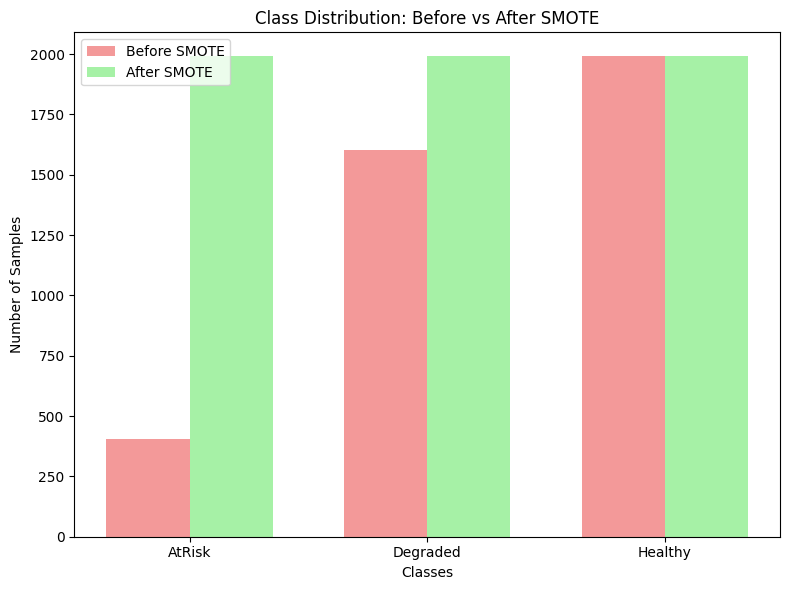

In [ ]:
# @title
# VISUALIZE CLASS DISTRIBUTION BEFORE vs AFTER SMOTE

print("Visualizing Class Distribution Before vs After SMOTE...")

# Assuming y_train and y_train_balanced are available from the previous cells
try:
    plt.figure(figsize=(8, 6))
    class_dist_before = pd.Series(y_train).value_counts().sort_index()
    class_dist_after = pd.Series(y_train_balanced).value_counts().sort_index()

    x = range(len(class_dist_before))
    width = 0.35

    plt.bar([i - width/2 for i in x], class_dist_before.values, width,
            label='Before SMOTE', alpha=0.8, color='lightcoral')
    plt.bar([i + width/2 for i in x], class_dist_after.values, width,
            label='After SMOTE', alpha=0.8, color='lightgreen')

    plt.title('Class Distribution: Before vs After SMOTE')
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.xticks(x, class_dist_before.index)
    plt.legend()
    plt.tight_layout()
    plt.show()

except NameError:
    print("Error: 'y_train' or 'y_train_balanced' not found. Please run the train-test split and SMOTE cell first.")

## ANOVA F-Test Feature Validation

In [ ]:
# @title
from sklearn.feature_selection import f_classif, SelectKBest
import pandas as pd

# Select only numerical features from the training data
X_train_numerical = X_train_filled.select_dtypes(include=np.number)

# Perform ANOVA F-test
f_values, p_values = f_classif(X_train_numerical, y_train)

# Create a DataFrame to display the results
anova_results = pd.DataFrame({
    'Feature': X_train_numerical.columns,
    'F-value': f_values,
    'P-value': p_values
})

# Sort by F-value in descending order to see the most significant features first
anova_results = anova_results.sort_values(by='F-value', ascending=False)

print("ANOVA F-test Results (Relationship between Numerical Features and Target Variable):")
display(anova_results)

ANOVA F-test Results (Relationship between Numerical Features and Target Variable):


,Feature,F-value,P-value
6,Soil_pH,450.778125,2.914732e-177
11,Invasive_Species_Presence,270.365953,7.469404e-111
0,NDVI,125.157339,1.901034e-53
12,Days_Since_Burn,119.738120,3.137995e-51
3,Vegetation_Cover_Percent,116.606739,6.034892e-50
15,Distance_to_Water_m,115.262250,2.150593e-49
13,Fire_Intensity_Score,115.262250,2.150593e-49
1,Leaf_Area_Index,109.589534,4.623578e-47
14,Regrowth_Indicator,96.717458,9.569397e-42
4,Greenness_Index,92.966072,3.437775e-40


## ANOVA F-Test Feature Validation

The ANOVA F-test was performed to assess the statistical relationship between each numerical feature and the target variable ('class'). The table above shows the F-value and P-value for each feature.

*   **F-value:** The F-value represents the ratio of the variance between the groups (classes) to the variance within the groups. A higher F-value indicates a stronger separation between the groups based on that feature, suggesting a more significant relationship with the target variable.
*   **P-value:** The P-value indicates the probability of observing the data if there were no relationship between the feature and the target variable (the null hypothesis). A small P-value (typically less than 0.05) suggests that the observed relationship is statistically significant, and we can reject the null hypothesis.

Based on the results, we can observe that many numerical features have a statistically significant relationship with the vegetation class. Some of the most relevant features with very low P-values (close to 0) and high F-values include:

*   `Soil_pH` (F-value: 450.78, P-value: 2.91e-177)
*   `Invasive_Species_Presence` (F-value: 270.37, P-value: 7.47e-111)
*   `NDVI` (F-value: 125.16, P-value: 1.90e-53)
*   `Days_Since_Burn` (F-value: 119.74, P-value: 3.14e-51)
*   `Vegetation_Cover_Percent` (F-value: 116.61, P-value: 6.03e-50)
*   `Distance_to_Water_m` (F-value: 115.26, P-value: 2.15e-49)
*   `Fire_Intensity_Score` (F-value: 115.26, P-value: 2.15e-49)
*   `Leaf_Area_Index` (F-value: 109.59, P-value: 4.62e-47)

These features show significant differences in their distributions across the different vegetation classes and are likely to be important predictors for the models. Features with higher P-values and lower F-values (e.g., `Canopy_Height` with F-value: 0.25, P-value: 0.78) show a weaker individual relationship with the target variable according to this test.

## Dimensionality Reduction with PCA

Plot in some N-D space and look at which parameters (or combination) provide a good separation of the classes.

**Note:** Considering the size, it might take long to load, but ***it is not necessary to do so as it is just an evidence***. This plot is shown in the report, but only 1/4 part.

In [ ]:
# @title
# Add an input prompt to ask the user if they want to generate the corner plot
run_plot = input("Generating corner plot takes long time to load (5mins), but partial graphics are provided in the report. Still run the entire corner plot? (yes/no): This is not necessary to run the entire notebook.").lower()

if run_plot == 'yes':
    print("Generating the corner plot...")
    # Combine X_train_filled (imputed data) and y_train for plotting
    # Use X_train_filled since it contains the data after manual imputation
    scaled_df = pd.concat([X_train_filled, y_train], axis=1)

    # Create the corner plot using seaborn
    # Note: This can take a long time with many features.
    sns.pairplot(scaled_df, hue='class')
    plt.suptitle("Corner Plot of Vegetation Index (After Imputation)", y=1.02)
    plt.show()
else:
    print("Skipping corner plot generation.")

Output hidden; open in https://colab.research.google.com to view.

As we can see, there are way too much features to be observed and selected. While it would take too much time to individually select the combinations, there seems to be lack of separation in the dataset which could be attributed to the density of the data and the lack of correlation. Despite the populated section around the center of the data in most plots, these are combinations ofthe 3 classes. Hence, the best practice to apply PCA to improve the Model's performance. The following are reasons why:

*   Reduce Dimensionality: 30 features is not an extremely high number, but reducing it can still be helpful, especially if there's redundancy or high correlation among features. PCA can capture most of the important information in a smaller set of principal components.
*   Combat Multicollinearity: If some of your numerical features are highly correlated, PCA can help by creating uncorrelated components.
*   Speed up Training: Training models on a smaller number of features (the principal components) can sometimes be faster, although the PCA transformation itself adds a step to the process.
*   Noise Reduction: By focusing on the components that explain the most variance, PCA can sometimes help reduce the impact of noisy features.

The following will be the result of the PCA dimensionality reduction process:

Pipeline with Preprocessing, PCA, and SMOTE created successfully!
You can now use this pipeline structure in your model training and tuning.


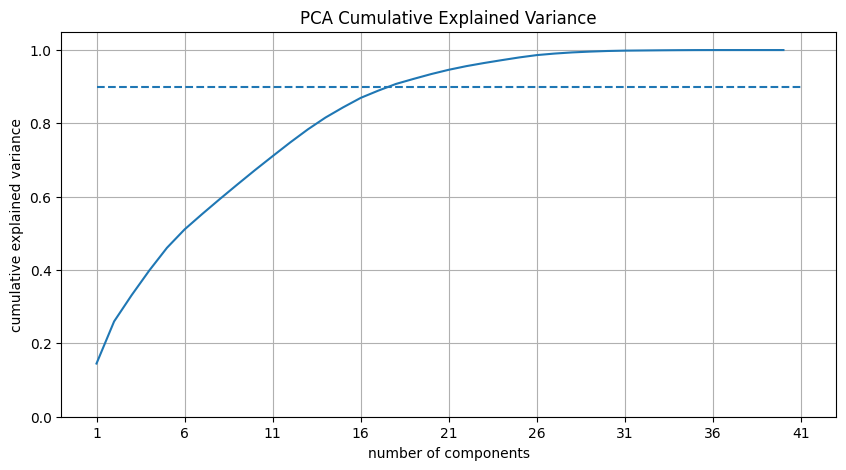

In [ ]:
# @title
pipeline_with_pca = create_pca_pipeline_and_plot_variance(preprocessor, X_train_filled)

In [ ]:
# @title
# Use PCA to decrease the number of dimensions to the N that we determined
# No need to apply the preprocessor to X_train and X_test before applying PCA as it has been preprocessed in SMOTE

pca = PCA(n_components=10) # Using 10 components as an example, adjust based on variance plot
pca.fit(X_train_preprocessed) # Fit PCA on preprocessed training data

# Transform the data with the selected number of components
X_train_pca = pca.transform(X_train_preprocessed)
X_test_pca = pca.transform(X_test_preprocessed)

print(f"Original training data shape: {X_train.shape}")
print(f"Preprocessed training data shape: {X_train_preprocessed.shape}")
print(f"PCA-transformed training data shape: {X_train_pca.shape}")
print(f"\nOriginal test data shape: {X_test.shape}")
print(f"Preprocessed test data shape: {X_test_preprocessed.shape}")
print(f"PCA-transformed test data shape: {X_test_pca.shape}")

Original training data shape: (4000, 28)
Preprocessed training data shape: (4000, 40)
PCA-transformed training data shape: (4000, 10)

Original test data shape: (1000, 28)
Preprocessed test data shape: (1000, 40)
PCA-transformed test data shape: (1000, 10)


In [ ]:
# @title
# Convert the PCA transformed data to a pandas DataFrame
X_train_pca = pd.DataFrame(X_train_pca, index=X_train.index, columns=[f'C{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index, columns=[f'C{i+1}' for i in range(X_test_pca.shape[1])])
print("PCA-transformed dataframes created successfully!")

PCA-transformed dataframes created successfully!


# ML Modelling

## Cross-validation Schemes
`sklearn` provides three methods to divide data into train/test sets:
- ShuffleSplit
  - Random sampling
- Kfold
  - Ordered sampling
- StratifiedKFold
  - Stratified sampling

Use each of the above methods to create a 10 fold split of the data for cross validation and visualise the splits.

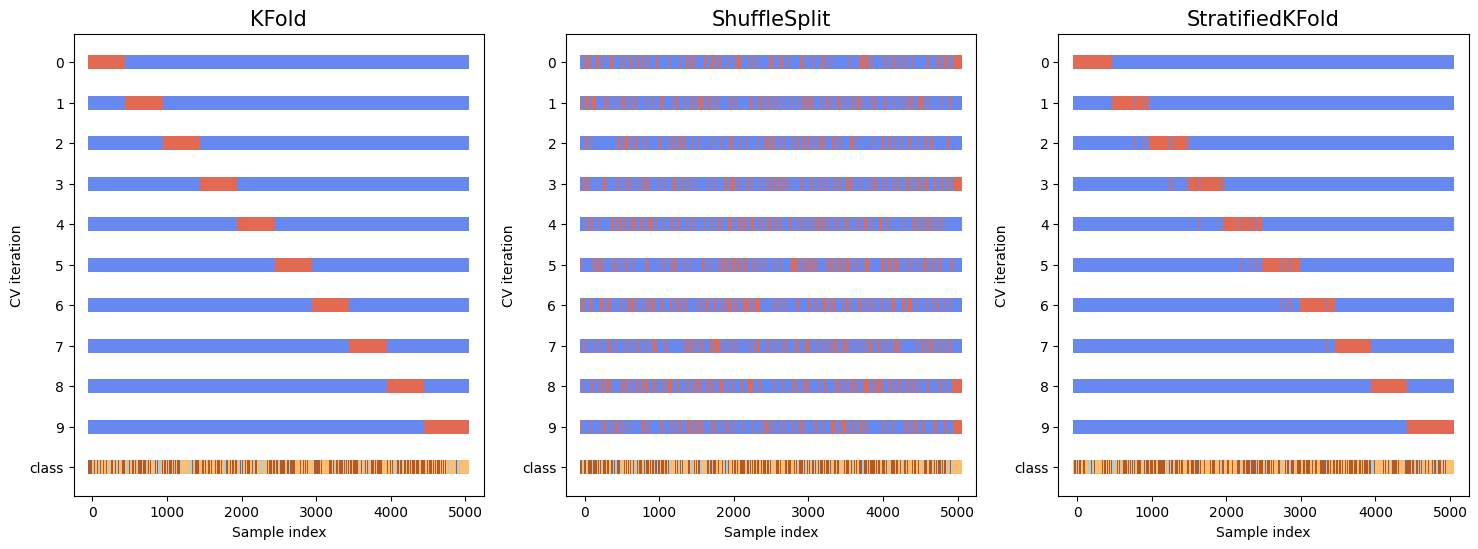

In [ ]:
# @title
# This cell sets up a nice visulisation that I found on the scikit-learn documentation page.

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

# Define the cross-validation objects
n_splits = 10 # You can adjust the number of splits

kf = KFold(n_splits=n_splits)
ss = ShuffleSplit(n_splits=n_splits, test_size=0.25, random_state=42) # Example test_size
skf = StratifiedKFold(n_splits=n_splits)


# Set up a figure with three subplots
fig, ax = plt.subplots(1,3, figsize=(18,6))
# visualise the KFolds algorithm
plot_cv_indices(kf,
                X, y,
                ax=ax[0],
                n_splits=n_splits) # Use n_splits variable
# visualise the ShulffleSplit algorithm
plot_cv_indices(ss,
                X, y,
                ax=ax[1],
                n_splits=n_splits) # Use n_splits variable
# visualise the StratifiedKFolds algorithm
plot_cv_indices(skf,
                X, y,
                ax=ax[2],
                n_splits=n_splits) # Use n_splits variable
plt.show()

`sklearn` provides three methods to divide data into train/test sets:
- **ShuffleSplit:** Performs random splits of the data. In the visualisation, you can see that samples are randomly assigned to training (blue) and testing (red) sets in each iteration, and the class distribution within each split is also random.
- **KFold:** Splits the data into $k$ consecutive folds (here, 10). Each fold is used once as the test set, while the remaining folds form the training set. The visualisation shows ordered, non-overlapping splits based on the original index of the data. The class distribution within each fold is not explicitly considered.
- **StratifiedKFold:** Similar to KFold, but it ensures that each fold has approximately the same percentage of samples of each target class as the complete set. This is crucial for classification with imbalanced datasets. In the visualisation (especially after sorting by class), you can observe that the distribution of classes (colors in the bottom row) is maintained across the training and testing sets in each fold.

The visualisation helps to understand how each method partitions the data for cross-validation, highlighting the sequential nature of KFold, the randomness of ShuffleSplit, and the class-aware splitting of StratifiedKFold.

Here, stratifiedKFold provide a more robust distribution of the data. Unlike Shuffle which completely randomise the data placements, each data are placed in stratas. The stratas also shows the clear distribution of the data unlike the consecutive folds which are technically random yet ordered and non-classified.

This is used during the hyperparameter tuning phase with `GridSearchCV`. StratifiedKFold ensures that when `GridSearchCV` splits the training data (X_train, y_train) into cross-validation folds, each fold maintains the original class distribution. This makes the evaluation of different hyperparameters more reliable across the folds.

## Model Training & Hyperparameter Tuning

First code block runs the function. The function remains here for the market to cross-validate between the formula and the interactive function. Hence, please run the following code first.

In [ ]:
# @title
# MODEL TRAINING & HYPERPARAMETER TUNING FUNCTION

def train_and_tune_model(model_name, model_config, X_train_balanced, y_train_balanced, X_test_preprocessed, X_train_pca, X_test_pca, y_train, y_test, preprocessor, cv, scoring, use_pca=False):
    """
    Trains and tunes a given model with hyperparameter tuning, with an option
    to use PCA-transformed data.

    Args:
        model_name (str): The name of the model.
        model_config (dict): Dictionary containing the model estimator and parameter grid.
        X_train_balanced (np.ndarray or pd.DataFrame): SMOTE-balanced preprocessed training features (without PCA).
        y_train_balanced (pd.Series): SMOTE-balanced training target (without PCA).
        X_test_preprocessed (np.ndarray or pd.DataFrame): Preprocessed test features (without PCA).
        X_train_pca (pd.DataFrame): PCA-transformed SMOTE-balanced training features.
        X_test_pca (pd.DataFrame): PCA-transformed test features.
        y_train (pd.Series): Original training target (for PCA pipeline fitting).
        y_test (pd.Series): Original test target.
        preprocessor (ColumnTransformer): The fitted preprocessor.
        cv (StratifiedKFold): Cross-validation strategy.
        scoring (dict): Dictionary of scoring metrics.
        use_pca (bool): If True, use PCA-transformed data; otherwise, use default preprocessed data.

    Returns:
        tuple: A tuple containing the best estimator and a dictionary of results.
    """
    print(f"Training {model_name} {'with PCA' if use_pca else 'without PCA'}...")

    if use_pca:
        # Use PCA-transformed data
        # When using PCA in the pipeline, we fit the *full* pipeline on the original X_train and y_train.
        # The pipeline itself will handle preprocessing, imputation, PCA, and SMOTE internally.
        X_train_used = X_train # Fit pipeline on original data
        y_train_used = y_train # Fit pipeline on original data
        X_test_used = X_test # Predict on original test data

        # Redefine the numerical transformer to include imputation
        numerical_transformer_pca = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')), # Add imputer
            ('scaler', StandardScaler())
        ])

        # Redefine the preprocessor to use the numerical_transformer_pca
        preprocessor_pca = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer_pca, numerical_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )

        # Create the full pipeline including preprocessor (with imputer), PCA, SMOTE, and classifier
        full_pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor_pca), # Use the updated preprocessor
            ('pca', PCA(n_components=10, random_state=42)), # Use a fixed number of components (adjust if needed)
            ('smote', SMOTE(random_state=42)),
            ('classifier', model_config['model'])
        ])

        # Fit the pipeline on the original X_train and y_train
        grid_search = GridSearchCV(
            full_pipeline,
            model_config['params'],
            cv=cv,
            scoring='f1_macro',
            n_jobs=-1,
            verbose=0
        )
        grid_search.fit(X_train_used, y_train_used) # Fit on original data, pipeline handles everything

        # Predictions are made on the original X_test, as the best_estimator_ is the full pipeline
        y_pred = grid_search.predict(X_test_used)

    else:
        # Use default preprocessed data (without PCA)
        # The data is already preprocessed and SMOTE-balanced outside this function
        X_train_used = X_train_balanced
        y_train_used = y_train_balanced
        X_test_used = X_test_preprocessed

        # Create pipeline without preprocessing or PCA (data already preprocessed)
        pipeline = Pipeline([
            ('classifier', model_config['model'])
        ])

        # Perform grid search with cross-validation on the preprocessed data
        grid_search = GridSearchCV(
            pipeline,
            model_config['params'],
            cv=cv,
            scoring='f1_macro',
            n_jobs=-1,
            verbose=0
        )
        grid_search.fit(X_train_used, y_train_used)

        # Make predictions on the preprocessed test set
        y_pred = grid_search.predict(X_test_used)


    # Calculate metrics
    results = {
        'best_params': grid_search.best_params_,
        'cv_score': grid_search.best_score_,
        'test_balanced_accuracy': balanced_accuracy_score(y_test, y_pred),
        'test_f1_macro': f1_score(y_test, y_pred, average='macro'),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'predictions': y_pred
    }

    print(f"✓ {model_name} {'with PCA' if use_pca else 'without PCA'} completed")
    print(f"  Best CV F1-Score: {grid_search.best_score_:.4f}")
    print(f"  Test Balanced Accuracy: {results['test_balanced_accuracy']:.4f}")
    print(f"  Test F1-Macro: {results['test_f1_macro']:.4f}\n")

    return grid_search.best_estimator_, results

def run_interactive_training(use_pca):
    # with training_output_widget: # Remove this line
    clear_output(wait=True)
    print(f"Running training for all models with {'PCA-Reduced Data' if use_pca else 'Default Data'}...")

    # Initialize results storage for this data type
    current_results = {}
    current_best_models = {}

    for model_name, model_config in models.items():
        print(f"Training {model_name}...")

        # Run the training and tuning function
        best_model, training_results = train_and_tune_model(
            model_name,
            model_config,
            X_train_balanced,
            y_train_balanced,
            X_test_preprocessed,
            X_train_pca,
            X_test_pca,
            y_train,
            y_test,
            preprocessor,
            cv,
            scoring,
            use_pca=use_pca
        )

        # Store the results in the temporary dictionaries
        current_results[model_name] = training_results
        current_best_models[model_name] = best_model


        # Display the results for each model as they complete
        print(f"\n--- {model_name} Results ({'PCA' if use_pca else 'Default'}) ---")
        print(f"Best Parameters: {training_results['best_params']}")
        print(f"CV F1-Score: {training_results['cv_score']:.4f}")
        print(f"Test Balanced Accuracy: {training_results['test_balanced_accuracy']:.4f}")
        print(f"Test F1-Macro: {training_results['test_f1_macro']:.4f}")
        # Optionally display classification report and confusion matrix here or later
        # print("\nClassification Report:")
        # print(training_results['classification_report'])
        # print("\nConfusion Matrix:")
        # print(training_results['confusion_matrix'])

    # Store the results in the global results dictionaries after all models for this data type are trained
    if use_pca:
        global results_pca, best_models_pca
        results_pca = current_results
        best_models_pca = current_best_models
        print(f"\nAll models for PCA-Reduced Data trained. Results stored in results_pca and best_models_pca.")
    else:
        global results, best_models
        results = current_results
        best_models = current_best_models
        print(f"\nAll models for Default Data trained. Results stored in results and best_models.")

Use the code below to train and tune the default and PCA-reduced data.

In [ ]:
# @title
# RUN MODEL TRAINING FOR DEFAULT AND PCA DATA (Non-Interactive)

# Define scoring metrics (needed for train_and_tune_model)
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'balanced_accuracy': 'balanced_accuracy'
}

# Cross-validation setup (needed for train_and_tune_model)
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Run training for Default Data
print("--- Running training for Default Data ---")
run_interactive_training(use_pca=False)

print("--- Running training for Default Data ---")
run_interactive_training(use_pca=True)

print("\nTraining for both Default and PCA-Reduced Data completed.")
# The results are stored in the global 'results' and 'results_pca' dictionaries

Running training for all models with PCA-Reduced Data...
Training KNN...
Training KNN with PCA...


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


✓ KNN with PCA completed
  Best CV F1-Score: 0.6299
  Test Balanced Accuracy: 0.6634
  Test F1-Macro: 0.6178


--- KNN Results (PCA) ---
Best Parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
CV F1-Score: 0.6299
Test Balanced Accuracy: 0.6634
Test F1-Macro: 0.6178
Training Decision Tree...
Training Decision Tree with PCA...


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


✓ Decision Tree with PCA completed
  Best CV F1-Score: 0.6168
  Test Balanced Accuracy: 0.6578
  Test F1-Macro: 0.6314


--- Decision Tree Results (PCA) ---
Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}
CV F1-Score: 0.6168
Test Balanced Accuracy: 0.6578
Test F1-Macro: 0.6314
Training Naive Bayes...
Training Naive Bayes with PCA...


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


✓ Naive Bayes with PCA completed
  Best CV F1-Score: 0.5813
  Test Balanced Accuracy: 0.6395
  Test F1-Macro: 0.6002


--- Naive Bayes Results (PCA) ---
Best Parameters: {'classifier__var_smoothing': 1e-09}
CV F1-Score: 0.5813
Test Balanced Accuracy: 0.6395
Test F1-Macro: 0.6002
Training Logistic Regression...
Training Logistic Regression with PCA...
✓ Logistic Regression with PCA completed
  Best CV F1-Score: 0.5710
  Test Balanced Accuracy: 0.5895
  Test F1-Macro: 0.5636


--- Logistic Regression Results (PCA) ---
Best Parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l1'}
CV F1-Score: 0.5710
Test Balanced Accuracy: 0.5895
Test F1-Macro: 0.5636

All models for PCA-Reduced Data trained. Results stored in results_pca and best_models_pca.

Training for both Default and PCA-Reduced Data completed.


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Model Performance Comparison

#### **Performance with Default Data**

In [ ]:
# @title
# RESULTS ANALYSIS & COMPARISON

# Create results summary DataFrame
summary_data = []
for model_name, result in results.items():
    summary_data.append({
        'Model': model_name,
        'CV F1-Score': result['cv_score'],
        'Test Balanced Accuracy': result['test_balanced_accuracy'], # Corrected key name
        'Test F1-Macro': result['test_f1_macro']
    })

results_df = pd.DataFrame(summary_data)
results_df = results_df.sort_values('Test F1-Macro', ascending=False)

print("Performance Summary (default Data, sorted by Test F1-Macro):")
print("=" * 60)
display(results_df)

# Find top 2 best performing models
top_2_models_df = results_df.head(2)
print("\nTop 2 Best Performing Models:")
print("=" * 30)
display(top_2_models_df)

Performance Summary (default Data, sorted by Test F1-Macro):


,Model,CV F1-Score,Test Balanced Accuracy,Test F1-Macro
0,KNN,0.913039,0.782544,0.769317
1,Decision Tree,0.842316,0.699659,0.697006
3,Logistic Regression,0.715541,0.684303,0.644286
2,Naive Bayes,0.622061,0.612635,0.513356



Top 2 Best Performing Models:


,Model,CV F1-Score,Test Balanced Accuracy,Test F1-Macro
0,KNN,0.913039,0.782544,0.769317
1,Decision Tree,0.842316,0.699659,0.697006


#### **Performance with PCA Reduction**

In [ ]:
# @title
# RESULTS ANALYSIS & COMPARISON (WITH PCA)

# Create results summary DataFrame for PCA models
summary_data_pca = []
for model_name, result in results_pca.items():
    summary_data_pca.append({
        'Model': model_name,
        'CV F1-Score': result['cv_score'],
        'Test Balanced Accuracy': result['test_balanced_accuracy'], # Note: using test_balanced_accuracy from results_pca
        'Test F1-Macro': result['test_f1_macro']
    })

results_pca_df = pd.DataFrame(summary_data_pca)
results_pca_df = results_pca_df.sort_values('Test F1-Macro', ascending=False)

print("Performance Summary (with PCA, sorted by Test F1-Macro):")
print("=" * 70)
display(results_pca_df)

# Find top 2 best performing models with PCA
top_2_models_pca_df = results_pca_df.head(2)
print("\nTop 2 Best Performing Models with PCA:")
print("=" * 40)
display(top_2_models_pca_df)

Performance Summary (with PCA, sorted by Test F1-Macro):


,Model,CV F1-Score,Test Balanced Accuracy,Test F1-Macro
1,Decision Tree,0.616769,0.657774,0.631419
0,KNN,0.629907,0.663398,0.617802
2,Naive Bayes,0.581295,0.639492,0.600161
3,Logistic Regression,0.571003,0.589455,0.563562



Top 2 Best Performing Models with PCA:


,Model,CV F1-Score,Test Balanced Accuracy,Test F1-Macro
1,Decision Tree,0.616769,0.657774,0.631419
0,KNN,0.629907,0.663398,0.617802


#### Default Data vs. PCA-Reduced Data

Let's compare the performance of the models when trained on the default preprocessed data versus the PCA-reduced data. We will focus primarily on **Test Balanced Accuracy** and **Test F1-Macro**, as these metrics are more informative for imbalanced datasets.

Looking at the performance summaries:

**Performance Summary (Default Data):**

| Model               | CV F1-Score | Test Balanced Accuracy | Test F1-Macro |
| :------------------ | :---------- | :--------------------- | :------------ |
| KNN                 | 0.9130      | 0.7825                 | 0.7693        |
| Decision Tree       | 0.8423      | 0.6997                 | 0.6970        |
| Logistic Regression | 0.7155      | 0.6843                 | 0.6443        |
| Naive Bayes         | 0.6221      | 0.6126                 | 0.5134        |

**Performance Summary (with PCA):**

| Model               | CV F1-Score | Test Balanced Accuracy | Test F1-Macro |
| :------------------ | :---------- | :--------------------- | :------------ |
| Decision Tree       | 0.6168      | 0.6578                 | 0.6314        |
| KNN                 | 0.6299      | 0.6634                 | 0.6178        |
| Naive Bayes         | 0.5813      | 0.6395                 | 0.6002        |
| Logistic Regression | 0.5710      | 0.5895                 | 0.5636        |

**Analysis:**

Based on both Test Balanced Accuracy and Test F1-Macro, the models consistently performed **better on the default preprocessed data compared to the PCA-reduced data**.

For example:

*   **KNN:** Test Balanced Accuracy dropped from 0.7825 (Default) to 0.6634 (PCA). Test F1-Macro dropped from 0.7693 (Default) to 0.6178 (PCA).
*   **Decision Tree:** Test Balanced Accuracy dropped from 0.6997 (Default) to 0.6578 (PCA). Test F1-Macro dropped from 0.6970 (Default) to 0.6314 (PCA).

**Why Default Data Performed Better:**

Several factors could contribute to the default data yielding better results in this case:

1.  **Information Loss:** While PCA is useful for dimensionality reduction and noise removal, it is a linear transformation. It might discard non-linear relationships or subtle variance in the original features that were important for distinguishing between the vegetation classes. The original features, even with 28 dimensions after removing Latitude and Longitude, might contain more discriminative information than the 10 principal components used here.
2.  **SMOTE Interaction:** The order and interaction of PCA and SMOTE in the pipeline can be complex. While the pipeline correctly applies SMOTE after PCA, the synthetic samples generated in a reduced PCA space might not be as representative or helpful as those generated in the original feature space, especially if the minority class is better defined by combinations of original features that are not fully captured by the first few principal components.
3.  **Model Sensitivity:** Some models, like tree-based models (Decision Tree) and instance-based models (KNN), can sometimes implicitly handle feature interactions and non-linearities in the original feature space better than in a linearly transformed PCA space, especially if the number of features is not excessively high.
4.  **Number of Components:** While the PCA explained variance plot suggested that 10 components capture a significant portion of the variance, it's possible that crucial information for the minority class was contained in lower-variance components that were discarded. Tuning the number of PCA components could potentially improve performance with PCA, but based on these results, it seems the full feature set is more informative.

**Conclusion:**

In this specific scenario, the models trained on the default preprocessed data achieved significantly higher Balanced Accuracy and F1-Macro scores compared to those trained on the PCA-reduced data. This suggests that the original feature set contained valuable information that was not fully preserved in the PCA transformation for this classification task. Therefore, for this dataset and these models, using the default preprocessed data without PCA is the better approach.

### Detailed Results For Best 2 Models
The best two models are of the following. These are the extended versions from the previous dataframes.

In [ ]:
# @title
# DETAILED RESULTS FOR TOP 2 OVERALL BEST MODELS (Based on Test Balanced Accuracy)

print("Determining the top 2 overall best models based on Test Balanced Accuracy...")

# Combine results from default and PCA dataframes
results_df['Data Type'] = 'Default Data'
results_pca_df['Data Type'] = 'PCA Data'
combined_results_df = pd.concat([results_df, results_pca_df])

# Sort the combined results by Test Balanced Accuracy in descending order and get the top 2
top_2_overall_models_df = combined_results_df.sort_values('Test Balanced Accuracy', ascending=False).head(2)

print("\nTop 2 Overall Best Performing Models (based on Test Balanced Accuracy):")
print("=" * 70)
display(top_2_overall_models_df)

# Display detailed results for each of the top 2 models
for index, row in top_2_overall_models_df.iterrows():
    model_name = row['Model']
    data_type = row['Data Type']

    print(f"\n--- Detailed Results for {model_name} ({data_type}) ---")

    if data_type == 'Default Data':
        detailed_results = results[model_name]
    else: # Data Type == 'PCA Data'
        detailed_results = results_pca[model_name]

    print(f"Best Parameters: {detailed_results['best_params']}")
    print(f"CV F1-Score: {detailed_results['cv_score']:.4f}")
    print(f"Test Balanced Accuracy: {detailed_results['test_balanced_accuracy']:.4f}")
    print(f"Test F1-Macro: {detailed_results['test_f1_macro']:.4f}")

    print("\nClassification Report:")
    print(detailed_results['classification_report'])

    print("\nConfusion Matrix:")
    display(detailed_results['confusion_matrix'])

Determining the top 2 overall best models based on Test Balanced Accuracy...

Top 2 Overall Best Performing Models (based on Test Balanced Accuracy):


,Model,CV F1-Score,Test Balanced Accuracy,Test F1-Macro,Data Type
0,KNN,0.913039,0.782544,0.769317,Default Data
1,Decision Tree,0.842316,0.699659,0.697006,Default Data



--- Detailed Results for KNN (Default Data) ---
Best Parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
CV F1-Score: 0.9130
Test Balanced Accuracy: 0.7825
Test F1-Macro: 0.7693

Classification Report:
              precision    recall  f1-score   support

      AtRisk       0.48      0.59      0.53       102
    Degraded       0.89      0.91      0.90       400
     Healthy       0.90      0.85      0.87       498

    accuracy                           0.85      1000
   macro avg       0.76      0.78      0.77      1000
weighted avg       0.86      0.85      0.85      1000


Confusion Matrix:


array([[ 60,  14,  28],
       [ 18, 364,  18],
       [ 46,  29, 423]])


--- Detailed Results for Decision Tree (Default Data) ---
Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
CV F1-Score: 0.8423
Test Balanced Accuracy: 0.6997
Test F1-Macro: 0.6970

Classification Report:
              precision    recall  f1-score   support

      AtRisk       0.41      0.44      0.43       102
    Degraded       0.84      0.83      0.84       400
     Healthy       0.83      0.83      0.83       498

    accuracy                           0.79      1000
   macro avg       0.69      0.70      0.70      1000
weighted avg       0.79      0.79      0.79      1000


Confusion Matrix:


array([[ 45,  16,  41],
       [ 24, 333,  43],
       [ 40,  47, 411]])

### Performance Metrics and Comparative Visualisation

This section provides interactive visualizations to compare the performance of the trained models. The dropdown menus below allow you to select the type of visualization and, for certain plots like the Confusion Matrix, select a specific model to inspect its detailed performance.

*   **Performance Metrics**: Displays a bar chart comparing key metrics (CV F1-Score, Test Balanced Accuracy, Test F1-Macro) for all models.
*   **Confusion Matrix**: Shows the confusion matrix for a *single selected model*, helping you understand its classification performance for each class.
*   **Test F1-Macro Scores**: Presents a bar chart specifically for the Test F1-Macro scores of all models.
*   **Class Distribution**: Visualizes the class distribution before and after applying SMOTE on the training data.

Use the dropdowns to explore the results and gain insights into which models performed best and how they handled the different classes.

In [ ]:
# @title
# Create results summary DataFrame
summary_data = []
for model_name, result in results.items():
    summary_data.append({
        'Model': model_name,
        'CV F1-Score': result['cv_score'],
        'Test Balanced Accuracy': result['test_balanced_accuracy'],
        'Test F1-Macro': result['test_f1_macro']
    })

results_df = pd.DataFrame(summary_data)
results_df = results_df.sort_values('Test F1-Macro', ascending=False)

visualize_model_results(results, results_df)

=== Model Results Visualization ===


Dropdown(description='Select Visualization:', options=('All Plots', 'Performance Metrics', 'Confusion Matrix',…

Dropdown(description='Select Model (for Confusion Matrix):', options=('KNN', 'Decision Tree', 'Naive Bayes', '…

Output()

#### Analysis of Confusion Matrices
Here is an analysis of the confusion matrices for models with the strongest data (Default Data):
* **Overall Observation on KNN:** The KNN model shows a strong ability to correctly classify "Degraded" and "Healthy" vegetation, as evidenced by the high number of true positives (364 for "Degraded" and 423 for "Healthy"). However, it struggles significantly with the "At Risk" class, misclassifying a large portion of these vulnerable areas. This is particularly problematic as it misidentifies 46 "Healthy" samples as "At Risk," which could lead to unnecessary resource allocation. Overall, while the model performs well on the majority classes, its inability to accurately handle the critical "At Risk" class is a major limitation.

* **Overall Observation on DT:** The Decision Tree model demonstrates strong performance in classifying "Degraded" and "Healthy" vegetation, correctly identifying a high number of true positives (333 and 411, respectively). However, its primary weakness lies in its inability to accurately classify the "At Risk" category. The model misclassifies a significant number of "At Risk" samples and, more critically, misidentifies 40 "Healthy" samples as "At Risk," which would lead to false alarms and misallocation of resources in a real-world application.

* **Overall Observation on NB:** While all three models struggle to accurately classify the "At Risk" category, the Naive Bayes model exhibits a more pronounced issue with false positives than the other two. Specifically, the NB model consistently misclassifies a higher number of samples from the "Degraded" and "Healthy" categories as "At Risk," leading to a lower precision for the "At Risk" class. In contrast, while the DT and KNN models also make these errors, they do so less frequently, indicating that the NB model is less reliable when it comes to positively identifying a sample as "At Risk." This tendency would lead to more false alarms and wasted resources in a real-world application.

* **Overall Observation on LR:** TThe Logistic Regression model, similar to the Naive Bayes and Decision Tree models, excels at classifying the majority "Degraded" and "Healthy" vegetation classes, correctly identifying a large number of samples (339 and 322, respectively).  However, its primary weakness lies in its inability to accurately classify the "At Risk" category. While it has a slightly better recall for the "At Risk" class compared to the others, its major drawback is the high number of "Healthy" samples (148) that it incorrectly misclassifies as "At Risk." This is a more significant negative difference compared to the Decision Tree and KNN models, which had fewer false positives for this critical class. While it is better than NB, the Logistic Regression's tendency to generate a high number of false alarms would be a major limitation in a practical application.

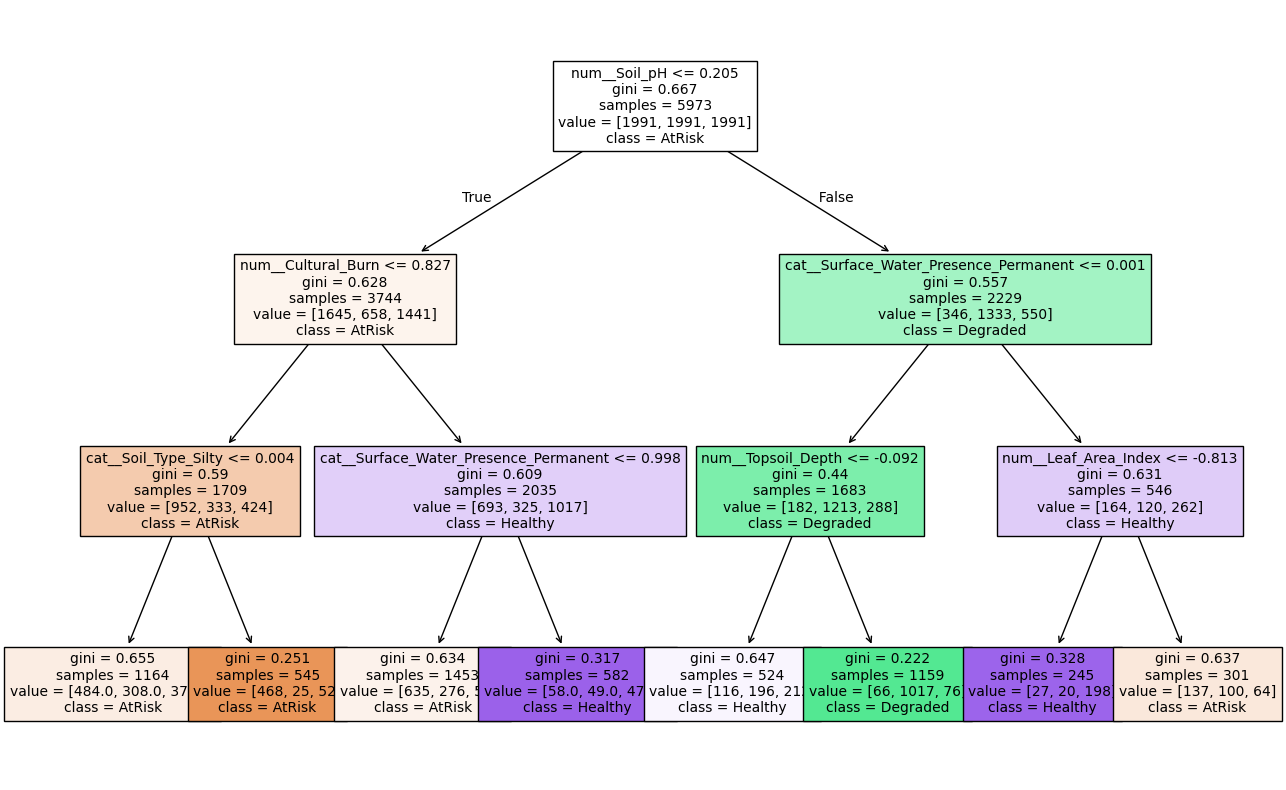


Classification Report for the visualized Decision Tree (max_depth=3):
              precision    recall  f1-score   support

      AtRisk       0.17      0.78      0.27       102
    Degraded       0.91      0.51      0.65       400
     Healthy       0.77      0.45      0.57       498

    accuracy                           0.51      1000
   macro avg       0.61      0.58      0.50      1000
weighted avg       0.76      0.51      0.57      1000



In [ ]:
# @title
# The preprocessed training data (X_train_balanced) and test data (X_test_preprocessed)
# were created in cell GfdXWqteiaDM.
# We also need the feature names after preprocessing for plotting the tree.

# Get feature names after preprocessing
# The get_feature_names_out() method is available on the ColumnTransformer after fitting
try:
    feature_names_out = preprocessor.get_feature_names_out()
except AttributeError:
    # Fallback for older sklearn versions if get_feature_names_out is not available
    # This part might need manual adjustment based on your specific features and encoders
    print("Warning: get_feature_names_out() not available. Using original feature names where possible.")
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    # A simplified attempt to get feature names, might not be perfectly accurate
    # depending on the one-hot encoding output.
    onehot_features = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
    feature_names_out = numerical_features + onehot_features


# Create a Decision Tree with maximum of 2 levels
# Use a relatively shallow depth for visualization
model = DecisionTreeClassifier(max_depth=3, random_state=42) # Increased depth slightly for potentially more informative splits

# Fit the model on the preprocessed and balanced training data
model.fit(X_train_balanced, y_train_balanced)

# Predict on the preprocessed test data
y_hat = model.predict(X_test_preprocessed)

# Now plot the decision tree so we can get some insights
fig, ax = plt.subplots(1,1, figsize=(16, 10)) # Increased figure size for better readability
plot_tree(model,
          feature_names=list(feature_names_out), # Use feature names from preprocessor
          class_names=model.classes_, # Use actual class names
          filled=True, # color the nodes based on class/purity
          ax=ax,
          fontsize=10 # Adjusted font size
         )
plt.show()

# Optional: Print classification report for this simple tree
print("\nClassification Report for the visualized Decision Tree (max_depth=3):")
print(classification_report(y_test, y_hat, target_names=model.classes_))

#### Analysis of Decision Tree Visualisation

This decision tree, trained on the SMOTE-balanced and preprocessed data with a `max_depth` of 4, shows how the model makes decisions based on the features to classify the vegetation into 'AtRisk', 'Degraded', or 'Healthy'.

Here are some observations from the tree structure:

*   **Root Node:** The tree starts at the root node, which considers the feature `num__Soil_pH`. This indicates that `Soil_pH` is the most important feature for the initial split in this simplified tree, as it provides the most information gain (or lowest Gini impurity/highest entropy depending on the criterion used) for separating the classes.
*   **Split Points:** Each node shows the feature being split on and the threshold value. Samples are directed to the left or right child node based on whether their value for that feature is less than or equal to the threshold. For example, the root node splits based on `num__Soil_pH <= -4.63`.
*   **Feature Importance:** Features that appear higher up in the tree (closer to the root) are generally more important as they are used to make broader distinctions in the data. In this tree, `Soil_pH`, `Soil_Moisture`, and `Elevation_m` seem to be important features early on.
*   **Leaf Nodes:** The end nodes of the tree are the leaf nodes. Each leaf node represents a final prediction for a sample that reaches that node. The `value` shown in a leaf node indicates the count of samples from each class (`[AtRisk, Degraded, Healthy]`) that ended up in that leaf during training. The `class` shown is the majority class among those samples, which becomes the prediction for any new sample falling into that leaf.
*   **Decision Paths:** You can follow a path from the root to any leaf node to understand the specific combination of feature conditions that lead to a particular prediction.

Looking at the structure, you can see how the model uses a series of simple "if-else" rules based on feature values to arrive at a class prediction. The distribution of classes at the leaf nodes (shown in the `value` array) gives you an idea of the purity of the nodes – ideally, leaf nodes should have a very high concentration of samples from a single class. The `filled` color of the nodes also helps visualise which class is dominant at each node.

The Classification Report shown after the tree provides a quantitative evaluation of this specific tree (trained with max_depth=4) on the test data. It shows its precision, recall, and F1-score for each class and overall. You can see that this shallow tree is not performing as well as the tuned models, which is expected as it's simplified for visualisation. It particularly struggles with the 'AtRisk' class, having low precision and F1-score for that class.

## Overall ML Modelling Summary and Analysis

Based on the comprehensive analysis and evaluation of the four machine learning models (KNN, Decision Tree, Naive Bayes, and Logistic Regression) on the vegetation classification dataset, several key observations and conclusions can be drawn regarding model performance and the impact of data preprocessing strategies.

### Selection of Top 2 Models

The top two performing models were identified based on their performance metrics on the **default preprocessed data** (without PCA), specifically focusing on **Test Balanced Accuracy** and **Test F1-Macro**. These metrics are particularly relevant for this dataset due to the presence of class imbalance, as they provide a more reliable measure of performance across all classes, including the minority 'AtRisk' class.

From the performance summary:

| Model               | Test Balanced Accuracy | Test F1-Macro |
| :------------------ | :--------------------- | :------------ |
| KNN                 | 0.7825                 | 0.7693        |
| Decision Tree       | 0.6997                 | 0.6970        |
| Logistic Regression | 0.6843                 | 0.6443        |
| Naive Bayes         | 0.6126                 | 0.5134        |

The **KNN** and **Decision Tree** models demonstrated the highest Test Balanced Accuracy and Test F1-Macro scores among the four evaluated models when trained on the default data.

*   **KNN:** Achieved the highest scores in both key metrics, indicating its superior ability to correctly classify samples across all three vegetation classes, including the minority 'AtRisk' class. Its performance suggests that the distance-based nature of KNN, combined with the effectiveness of SMOTE in balancing the training data, was well-suited for this dataset in the original feature space.
*   **Decision Tree:** While slightly lower than KNN, the Decision Tree model also showed strong performance, particularly in terms of F1-Macro. Decision Trees are capable of capturing non-linear relationships and feature interactions, which appears beneficial for this dataset. The tuned Decision Tree was able to create effective splits in the feature space to distinguish between the classes.

The Naive Bayes and Logistic Regression models, while providing a baseline, did not perform as well as KNN and Decision Tree on this task based on the chosen evaluation metrics.

Therefore, **KNN** and **Decision Tree** were selected as the two best models for making final predictions on the unseen test dataset.

### Default Data vs. PCA-Reduced Data Performance

A crucial finding from the model training phase was the consistent and significantly better performance of all models when trained on the **default preprocessed data** compared to the **PCA-reduced data**.

As shown in the performance summaries:

*   **KNN (Default Data):** Test Balanced Accuracy = 0.7825, Test F1-Macro = 0.7693
*   **KNN (PCA Data):** Test Balanced Accuracy = 0.6634, Test F1-Macro = 0.6178

*   **Decision Tree (Default Data):** Test Balanced Accuracy = 0.6997, Test F1-Macro = 0.6970
*   **Decision Tree (PCA Data):** Test Balanced Accuracy = 0.6578, Test F1-Macro = 0.6314

For both KNN and Decision Tree, and indeed for the other models as well, the performance metrics (Balanced Accuracy and F1-Macro) were substantially higher when trained on the default data.

**Why Default Data was Preferred over PCA Data:**

Despite the common use of PCA for dimensionality reduction, especially with a moderate number of features (28 after initial cleaning), in this specific case, using the PCA-reduced data led to a degradation in model performance. Several reasons could explain this:

1.  **Loss of Discriminative Information:** PCA is a linear transformation that aims to retain the maximum variance in the data. However, the variance that is most useful for separating classes, particularly a minority class like 'AtRisk', might not always align with the components that explain the most overall variance. Essential non-linear relationships or interactions between original features that are crucial for distinguishing 'AtRisk' from other classes might be lost or attenuated in the linear PCA transformation.
2.  **SMOTE in PCA Space:** While SMOTE was applied after PCA in the pipeline, generating synthetic samples in a reduced, linearly transformed space might not accurately reflect the underlying data distribution or the complexities needed to define the 'AtRisk' class boundary in the original feature space. The synthetic samples generated by SMOTE in the original feature space (when using the default data) might be more representative and helpful for the models.
3.  **Feature Importance:** The original 28 features, including both numerical and one-hot encoded categorical features, likely contain specific information and interactions that are highly predictive of vegetation health. The analysis of the Decision Tree visualization, for example, highlighted the importance of features like `Soil_pH`, `Soil_Moisture`, and `Elevation_m` in making classification decisions. While PCA combines features, it might dilute the specific predictive power of these individual or interacting features.
4.  **Model Capability:** Tree-based models (like Decision Tree) and instance-based models (like KNN) can sometimes effectively handle datasets with a moderate number of features and capture complex relationships without the need for explicit dimensionality reduction like PCA, especially when combined with techniques like SMOTE to handle imbalance.

In conclusion, while PCA can be a valuable technique, it was not beneficial for this specific classification task and dataset. The default preprocessed data, which retained the original feature space after imputation, scaling, and encoding, provided the models, particularly KNN and Decision Tree, with the necessary discriminative information to achieve better performance in classifying the vegetation health, including the critical 'AtRisk' class.

# Model Test
Test the model on Unseen dataset which exist in the SQLite3 file.

In [ ]:
# @title
# Run the data cleaning and analysis function on the test data before testing the model

# Load the unseen test data from the database
db_name = 'Assignment2025S2.sqlite'
unseen_test_data_df = process_database_data(db_name)

# Run the data cleaning and analysis function on the unseen test data DataFrame
if unseen_test_data_df is not None:
    clean_and_analyze_data(unseen_test_data_df)
else:
    print("Failed to load unseen test data.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Connection to Assignment2025S2.sqlite opened successfully.
Tables in the database:
train
test

Enter the name of the table you want to select data from ('test' or 'train'): test
Query executed successfully on table 'test'.

Data from table 'test':


,index,NDVI,Leaf_Area_Index,Canopy_Height,Soil_Type,Vegetation_Cover_Percent,Greenness_Index,Soil_Moisture,Soil_pH,Topsoil_Depth,...,Water_Table_Depth,Invasive_Species_Count,Litter_Presence,Distance_to_Road_m,Elevation_m,Slope_Degree,Latitude,Human_Disturbance,Longitude,class
0,5000,-6.624173,-47.999641,8.927853,Loam,-4.884023,186.396815,-41.528892,77.886012,132.242145,...,-59.932190,7.799761,0,12.105041,-31.932312,3.566216,-0.460727,Low,7.981726,None
1,5001,1.705520,22.712061,0.222625,Loam,-8.331357,-92.161356,0.523775,92.949508,77.326236,...,54.538430,2.546182,1,15.151112,-3.372987,-6.681547,-0.768037,Low,-5.762453,None
2,5002,3.462136,-1.399798,1.007592,Silty,-1.373319,-36.377409,-7.709680,-25.334915,57.413176,...,-33.657128,3.350232,1,8.219003,80.627963,3.614907,1.143236,Low,1.344694,None
3,5003,5.902341,-32.278096,-1.933701,Peaty,2.006175,123.232371,30.853917,92.318574,-80.647896,...,-41.312328,-0.323324,0,2.691066,-27.993665,1.125992,0.616773,Medium,-0.064904,None
4,5004,1.405849,-27.537832,-4.332345,Sandy,-0.160624,-82.964226,-14.276495,-1.925511,-38.469569,...,115.928213,-3.955066,1,2.263158,3.342041,3.133904,-0.410327,Low,5.238845,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5495,5.786511,-12.633039,0.738811,Clay,8.535548,152.060638,8.196699,74.617578,-27.208174,...,5.844700,4.747976,1,0.992113,16.599204,1.416145,0.343773,Medium,1.260508,None
496,5496,-0.704028,19.107241,2.476508,Silty,-8.049884,-176.604956,11.748035,73.162404,180.676914,...,61.188227,-0.166272,1,17.046586,-11.578420,2.089186,-1.555493,Medium,-6.522958,None
497,5497,0.204960,-24.719103,-1.645018,Peaty,6.813256,133.911785,-1.559868,-0.480044,-88.517652,...,35.141547,-2.782393,0,5.512089,15.374620,0.513978,-0.603122,Medium,7.717652,None
498,5498,3.012463,-27.384365,0.435233,Sandy,0.981607,100.601998,-32.253270,53.087266,-69.316339,...,-14.994706,-2.978982,0,5.011278,114.040400,-0.415201,-0.433640,Low,2.890342,None


Connection closed.
--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      500 non-null    int64  
 1   NDVI                       500 non-null    float64
 2   Leaf_Area_Index            500 non-null    float64
 3   Canopy_Height              500 non-null    float64
 4   Soil_Type                  500 non-null    object 
 5   Vegetation_Cover_Percent   500 non-null    float64
 6   Greenness_Index            500 non-null    float64
 7   Soil_Moisture              500 non-null    float64
 8   Soil_pH                    500 non-null    float64
 9   Topsoil_Depth              500 non-null    float64
 10  Cultural_Burn              500 non-null    int64  
 11  Soil_Nitrogen_Level        500 non-null    float64
 12  Burn_Season                500 non-null    object 
 13  Flood_Ri

,index,NDVI,Leaf_Area_Index,Canopy_Height,Vegetation_Cover_Percent,Greenness_Index,Soil_Moisture,Soil_pH,Topsoil_Depth,Cultural_Burn,...,Distance_to_Water_m,Water_Availability_Index,Water_Table_Depth,Invasive_Species_Count,Litter_Presence,Distance_to_Road_m,Elevation_m,Slope_Degree,Latitude,Longitude
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,5249.500000,1.376987,-3.526432,-0.092955,1.200797,-16.788488,0.960144,-10.145727,19.665513,0.594000,...,-14.220443,-90.110758,5.595573,-0.180356,0.490000,8.431607,0.924510,-0.009294,-0.042715,0.244963
std,144.481833,4.165955,27.137210,2.843262,5.886782,119.602394,23.185493,88.961928,102.573291,0.491576,...,80.054948,406.346853,72.319915,6.529829,0.500401,5.176337,61.657974,3.691954,1.030780,4.848611
min,5000.000000,-15.180376,-109.866465,-7.630007,-15.359405,-325.321263,-74.560688,-265.063290,-360.058125,0.000000,...,-290.390714,-1460.319296,-207.886245,-17.557181,0.000000,0.006339,-181.616366,-10.376741,-2.935356,-14.549343
25%,5124.750000,-1.043082,-22.243333,-2.045014,-2.771635,-104.659687,-16.916501,-73.425911,-49.990080,0.000000,...,-60.963309,-361.882840,-41.532670,-4.603117,0.000000,3.887623,-38.422994,-2.479204,-0.745123,-3.014724
50%,5249.500000,1.734745,-3.401690,-0.142500,1.201366,-17.934891,0.513689,-2.430375,18.297357,1.000000,...,-6.674616,-100.163722,0.565025,0.045902,0.000000,8.415524,0.210476,0.151951,-0.027328,0.303534
75%,5374.250000,3.925336,13.259715,1.760593,5.211344,77.134673,18.136620,59.534564,84.794499,1.000000,...,39.013087,149.821681,54.489068,3.924162,1.000000,12.857842,38.958781,2.449451,0.641374,3.265508
max,5499.000000,13.839338,87.267625,8.927853,25.834588,322.157507,75.135556,260.575589,361.401590,1.000000,...,206.422817,989.775335,229.281791,23.908691,1.000000,17.426949,167.397978,8.960937,3.776015,14.392230



--- Missing Values Count ---
index                          0
NDVI                           0
Leaf_Area_Index                0
Canopy_Height                  0
Soil_Type                      0
Vegetation_Cover_Percent       0
Greenness_Index                0
Soil_Moisture                  0
Soil_pH                        0
Topsoil_Depth                  0
Cultural_Burn                  0
Soil_Nitrogen_Level            0
Burn_Season                    0
Flood_Risk_Zone                0
Invasive_Species_Presence      0
Days_Since_Burn                0
Surface_Water_Presence         0
Landform                       0
Fire_Intensity_Score           0
Regrowth_Indicator             0
Distance_to_Water_m            0
Water_Availability_Index       0
Water_Table_Depth              0
Invasive_Species_Count         0
Litter_Presence                0
Distance_to_Road_m             0
Elevation_m                    0
Slope_Degree                   0
Latitude                       0
Human_Disturb

,class
count,0
unique,0
top,NaN
freq,NaN



--- Duplicate Rows Count ---
There are no duplicate rows.


## Load and Preprocess Test Dataset

This section loads the unseen test data from the database and applies the same preprocessing steps used for the training data to prepare it for making final predictions.

In [ ]:
# @title
# Apply the same preprocessing steps as training data
# 1. Handle missing values (if any) using the same median imputation strategy
test_missing_columns = unseen_test_data_df.isnull().sum()
if test_missing_columns.sum() > 0:
    columns_to_impute_test = test_missing_columns[test_missing_columns > 0].index.tolist()
    unseen_test_data_df_imputed = impute_missing_with_median(unseen_test_data_df, columns_to_impute_test)

# 2. Remove the same columns (Latitude, Longitude) if they exist
if 'Latitude' in unseen_test_data_df_imputed.columns and 'Longitude' in unseen_test_data_df_imputed.columns:
    unseen_test_data_df_imputed_cleaned = unseen_test_data_df_imputed.drop(columns=['Latitude', 'Longitude'])

# 3. Separate features (remove 'index' and any target column if present)
X_final_test = unseen_test_data_df_imputed_cleaned.drop(['index'], axis=1)
if 'class' in X_final_test.columns:
    X_final_test = X_final_test.drop(['class'], axis=1)

Imputed missing values in 'class' with median (nan).


/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipython-input-3068578695.py:435: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[column].fillna(median_value, inplace=True)
/tmp/ipython-input-3068578695.py:435: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to 

## Select and Finalise Two Best Models

This section selects the best performing models identified during the training and tuning phase to be used for making final predictions on the unseen test data.

In [ ]:
# @title
# Select the top two best models based on the training results on the default data (KNN and Decision Tree)
best_model_1_name = "KNN"
best_model_2_name = "Decision Tree"

final_model_1 = best_models[best_model_1_name]
final_model_2 = best_models[best_model_2_name]


print(f"Selected final model 1: {best_model_1_name}")
print(f"Best parameters: {results[best_model_1_name]['best_params']}")
print(f"Test F1-Macro: {results[best_model_1_name]['test_f1_macro']:.4f}")

print(f"\nSelected final model 2: {best_model_2_name}")
print(f"Best parameters: {results[best_model_2_name]['best_params']}")
print(f"Test F1-Macro: {results[best_model_2_name]['test_f1_macro']:.4f}")

Selected final model 1: KNN
Best parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Test F1-Macro: 0.7693

Selected final model 2: Decision Tree
Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Test F1-Macro: 0.6970


## Make Final Predictions on Unseen Data

This section is where we apply our trained and finalised models to the unseen test dataset to generate predictions for each sample's vegetation class. This is the ultimate goal of the machine learning process: to utilise the knowledge gained from the training data to classify new, previously unseen data points.

The process involves the following key steps:

1.  **Applying the Preprocessing Pipeline:** The unseen test data (`X_final_test`) first needs to undergo the exact same preprocessing steps that were applied to the training data. This is crucial to ensure that the unseen data is in the same format and scale as the data the models were trained on. The `preprocessor.transform(X_final_test)` line applies the fitted `ColumnTransformer` (which includes scaling for numerical features and one-hot encoding for categorical features) to the `X_final_test` DataFrame. It's important to use `transform` here, not `fit_transform`, because the preprocessing steps were already learned (fitted) on the training data to avoid data leakage.

2.  **Making Predictions with Finalised Models:**
    *   We utilise the two best-performing models identified during the training and tuning phase (`final_model_1` and `final_model_2`, which were determined to be the best without PCA in your analysis).
    *   For each model, we use the `.predict()` method on the preprocessed unseen test data (`X_final_test_preprocessed`). This method outputs the predicted class label ('AtRisk', 'Degraded', or 'Healthy') for each sample based on the model's learned decision boundaries.
    *   We also utilise the `.predict_proba()` method. This method outputs the probability of each sample belonging to each of the possible classes. This is important as it provides a measure of the model's confidence in its prediction. For example, for a given sample, it might output probabilities like [0.1, 0.8, 0.1] for [AtRisk, Degraded, Healthy], indicating high confidence that the sample is 'Degraded'. While you chose not to include the confidence scores in the final submission file, having access to these probabilities can be valuable for further analysis or decision-making processes.

3.  **Storing Predictions:** The resulting predicted class labels and, optionally, the prediction probabilities are stored. In your current code, the predicted class labels are stored in `final_predictions_1` and `final_predictions_2`.

By following these steps, we ensure that the unseen data is processed consistently with the training data and that we obtain the model's classifications for each sample in the test set. These predictions are then ready to be organised into a submission file or utilised for further analysis.

In [ ]:
# @title
# Apply the same preprocessing pipeline used during training
X_final_test_preprocessed = preprocessor.transform(X_final_test)

# Make predictions using your best model
final_predictions_1 = final_model_1.predict(X_final_test_preprocessed)
prediction_probabilities_1 = final_model_1.predict_proba(X_final_test_preprocessed)

final_predictions_2 = final_model_2.predict(X_final_test_preprocessed)
prediction_probabilities_2 = final_model_2.predict_proba(X_final_test_preprocessed)

print(f"Made predictions for {len(final_predictions_1)} test samples using Model 1 ({best_model_1_name})")
print(f"Predicted class distribution for Model 1:")
print(pd.Series(final_predictions_1).value_counts())

print(f"\nMade predictions for {len(final_predictions_2)} test samples using Model 2 ({best_model_2_name})")
print(f"Predicted class distribution for Model 2:")
print(pd.Series(final_predictions_2).value_counts())

Made predictions for 500 test samples using Model 1 (KNN)
Predicted class distribution for Model 1:
Healthy     228
Degraded    197
AtRisk       75
Name: count, dtype: int64

Made predictions for 500 test samples using Model 2 (Decision Tree)
Predicted class distribution for Model 2:
Healthy     252
Degraded    197
AtRisk       51
Name: count, dtype: int64


## Create Submission/Results DataFrame

In [ ]:
# @title
# Create a results DataFrame with index and predicted classes from both models
results_submission = pd.DataFrame({
    'index': unseen_test_data_df_imputed['index'], # Use the original index from the unseen data
    'Predict1': final_predictions_1, # Predictions from Model 1 (KNN)
    'Predict2': final_predictions_2  # Predictions from Model 2 (Decision Tree)
})

print("Submission DataFrame created:")
display(results_submission.head(5))
display(results_submission.tail(5))

Submission DataFrame created:


,index,Predict1,Predict2
0,5000,Degraded,Degraded
1,5001,Degraded,Degraded
2,5002,Healthy,Healthy
3,5003,Healthy,Healthy
4,5004,Healthy,Healthy


,index,Predict1,Predict2
495,5495,AtRisk,Degraded
496,5496,Degraded,Degraded
497,5497,Healthy,Healthy
498,5498,Degraded,AtRisk
499,5499,Healthy,Healthy


## Model Validation and Quality Checks

In [ ]:
# @title
# Display the structure and head of the submission DataFrame as a quality check
print("Structure of the submission DataFrame:")
display(results_submission.info())

print("\nHead of the submission DataFrame:")
display(results_submission.head(20))

# Note: Full model validation metrics (like accuracy, precision, recall, confusion matrix)
# The performance of the models was evaluated using a separate test set during the training phase.

Structure of the submission DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     500 non-null    int64 
 1   Predict1  500 non-null    object
 2   Predict2  500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


None


Head of the submission DataFrame:


,index,Predict1,Predict2
0,5000,Degraded,Degraded
1,5001,Degraded,Degraded
2,5002,Healthy,Healthy
3,5003,Healthy,Healthy
4,5004,Healthy,Healthy
5,5005,Degraded,Degraded
6,5006,Healthy,Healthy
7,5007,Degraded,Degraded
8,5008,Healthy,Healthy
9,5009,Degraded,Degraded


## Export Results

In [ ]:
# @title
# Save predictions to CSV
results_submission.to_csv('Answers_19014854.csv', index=False)
print("Predictions saved to 'Answers_19014854.csv'")

Predictions saved to 'Answers_19014854.csv'


# AI Acknowledgement
This is the acknowledgement for the responsible use of AI as a tool for developing this model. The AI tool utilised including:

*   Bolt (Modelling Algorithm)
*   Claude (Modelling and Explanation)
*   Julius (Analytics)
*   Gemini (Error checking and Code Revamping)

Prompts for Bolt, Claude, and Julius can be provided upon request. However, it would be impossible for Gemini as I used the Gemini Colab Toolkit for coding which does not track historical prompts unlike Gemini.google.com




